In [1]:
import matplotlib.pyplot as plt
from qiskit.circuit import ParameterVector
import numpy as np
from qiskit.execute_function import execute
from qiskit import BasicAer
from qiskit import QuantumCircuit
import qiskit
from qiskit import Aer
# from qiskit.primitives import Sampler
from numpy.linalg import eig
from qiskit.opflow import Z, I, X, Y
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.circuit import Parameter

C:\Users\DELL\AppData\Local\Temp\ipykernel_2988\2017661958.py:11: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import Z, I, X, Y


In [2]:
# import model
from CoreVQEModified import Ising_hamiltonian
# import ansatz 
from CoreVQEModified import Customize_RealAmplidues, Customize_EfficientSU2
# import optimize
from CoreVQEModified import Customize_Finite_Difference, Customize_Parameter_Shift_Rule, Customize_Quantum_Natural_Gradient_Descent, Customize_SPSA, Customize_QNSPSA_PRS_blocking, Customize_QN_SPSA_blocking, Customize_QNSPSA_SPSA_blocking, Customize_HESPSA_SPSA_blocking, Customize_HE_PRS
#import Measurement
from CoreVQEModified import Transverse_Ising_Measurement

In [3]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.opflow.primitive_ops.pauli_sum_op import PauliSumOp
from qiskit.algorithms import NumPyEigensolver

exact_solver = NumPyEigensolver(k=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2988\908257690.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import NumPyEigensolver
C:\Users\DELL\AppData\Local\Temp\ipykernel_2988\908257690.py:5: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)


In [21]:
params = []
num_qubits = 12
h = 2
reps = 1
ansatz = Customize_RealAmplidues(num_qubits, reps)
ansatz_name = 'RealAmplidues'

optimizes = [Customize_Quantum_Natural_Gradient_Descent, Customize_QNSPSA_PRS_blocking]

external_field = np.linspace(0,2,11)
for j in range(len(optimizes)):
    for i in range(len(external_field)):
        params.append((num_qubits, i, optimizes[j]))

In [24]:
(params)

[(12,
  0,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler)>),
 (12,
  1,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler)>),
 (12,
  2,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler)>),
 (12,
  3,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler)>),
 (12,
  4,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler)>),
 (12,
  5,
  <function CoreVQEModified.Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, sho

In [15]:
external_field = np.linspace(0,2,11)
print(external_field)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


In [85]:
print((exact_solver.compute_eigenvalues(Ising_hamiltonian(6, -1, -2))).eigenvalues.real[0])

-12.769389127207333


In [4]:
def open_file(optimize, eta, shots, interation, ansatz_name, num_qubits, reps, exchange_interaction, external_field, times):
    file_name_energy = f'{optimize} - LR {eta} - shots {shots} - interation {interation} - {ansatz_name}({num_qubits},{reps}) - J{exchange_interaction}h{external_field} - Energy - {times+1}'
    data_file_name_energy = open(f'{file_name_energy}.txt', 'r').readlines()[2:502]

    data_output = np.zeros(len(data_file_name_energy))

    for i in range(len(data_file_name_energy)):
        data_output[i] = data_file_name_energy[i].split(' ')[0]

    return (data_output)

In [15]:
optimize = 'Customize_QNSPSA_PRS_blocking'
eta = 0.01
shots = "None"
interation = 500
ansatz_name = "RealAmplidues"
num_qubits = 12
reps = 1
exchange_interaction = 1
external_field = 1.6
times = 4

file_name_energy = f'{optimize} - LR {eta} - shots {shots} - interation {interation} - {ansatz_name}({num_qubits},{reps}) - J{exchange_interaction}h{external_field} - Parameters - {times+1}'
data_file_name_energy = open(f'{file_name_energy}.txt', 'r').readlines()

In [26]:
a = eval(data_file_name_energy[-4])
print(a)
print(np.array(a)+4)

[-15.707171986122093, 4.416882399682683, 17.002159169489044, 30.35499771354507, 8.444873665087654, 5.317076136211361, 24.15280150613529, 5.217410928364673, 4.961496011100121, 20.040564394716643, 16.234150790827186, -34.55889505969402, 15.999681119539257, 22.216167281466415, 19.113577962686144, 16.080511028839297, -21.9993491001328, -31.44171950213388, -31.309344338568636, -25.42179214115042, -16.449207810091757, -16.93223133850669, -13.839778957444821, -5.009811869516658]
[-11.70717199   8.4168824   21.00215917  34.35499771  12.44487367
   9.31707614  28.15280151   9.21741093   8.96149601  24.04056439
  20.23415079 -30.55889506  19.99968112  26.21616728  23.11357796
  20.08051103 -17.9993491  -27.4417195  -27.30934434 -21.42179214
 -12.44920781 -12.93223134  -9.83977896  -1.00981187]


In [33]:
optimize[:16]

'Customize_QNSPSA'

In [28]:
import os

print(os.path.isfile(f'{file_name_energy}.txt'))

True


# Figure 1

13 qubit

In [12]:
CoByla_ReAm_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
FiniteDifference_ReAm_13_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_13_500_J1h2_1 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_13_500_J1h2_2 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=1)
SPSA_ReAm_13_500_J1h2_3 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=2)

In [1]:
Ising_hamiltonian(13, 1, 2)

NameError: name 'Ising_hamiltonian' is not defined

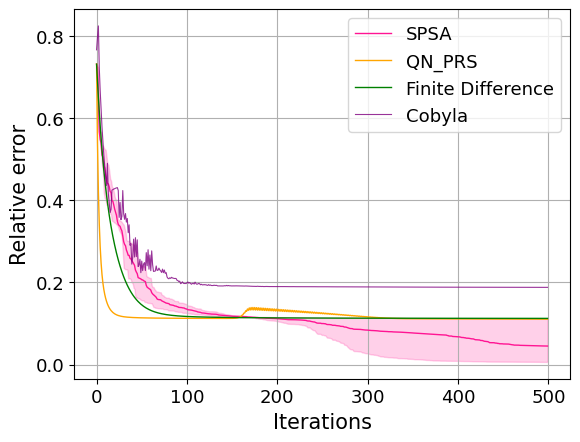

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_13_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(13, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)

high_SPSA_ReAm_13_500_J1h2 = np.zeros(interation)
low_SPSA_ReAm_13_500_J1h2 = np.zeros(interation)

for i in range(interation):
    high_SPSA_ReAm_13_500_J1h2[i] = abs((max(SPSA_ReAm_13_500_J1h2_1[i], SPSA_ReAm_13_500_J1h2_2[i], SPSA_ReAm_13_500_J1h2_3[i]) - gs_energy_13_J1_h2)/gs_energy_13_J1_h2)
    low_SPSA_ReAm_13_500_J1h2[i] = abs((min(SPSA_ReAm_13_500_J1h2_1[i], SPSA_ReAm_13_500_J1h2_2[i], SPSA_ReAm_13_500_J1h2_3[i]) - gs_energy_13_J1_h2)/gs_energy_13_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(abs(((SPSA_ReAm_13_500_J1h2_1+SPSA_ReAm_13_500_J1h2_2+SPSA_ReAm_13_500_J1h2_3)/3-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, high_SPSA_ReAm_13_500_J1h2, low_SPSA_ReAm_13_500_J1h2, color='deeppink', alpha=.2)

plt.plot(abs((QNG_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, label='QN_PRS')  
plt.plot(abs((FiniteDifference_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=0.8, alpha=0.8, label='Cobyla')  
# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
plt.legend(fontsize=13)

plt.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
plt.show()
fig.savefig('./Figure/Figure1-13-ReAm-.png', format='png', dpi=600)

12 qubit

In [11]:
QNG_ReAm_12_500_J1h2[-1]

-22.467400093748658

In [8]:
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
FiniteDifference_ReAm_12_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QN_SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QN_SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QN_SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QN_SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QN_SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QN_SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QN_SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_PRS_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_PRS_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_SPSA_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_SPSA_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_SPSA_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_SPSA_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_SPSA_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_SPSA_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_SPSA_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

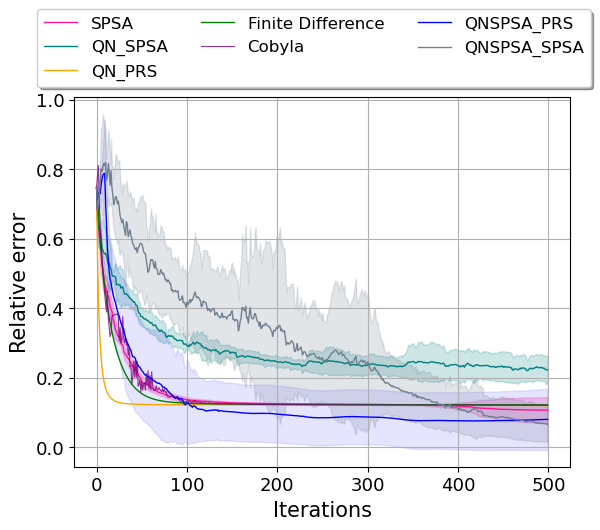

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)

mean_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([SPSA_ReAm_12_500_J1h2_1[0:interation], SPSA_ReAm_12_500_J1h2_2[0:interation], SPSA_ReAm_12_500_J1h2_3[0:interation], SPSA_ReAm_12_500_J1h2_4[0:interation], SPSA_ReAm_12_500_J1h2_5[0:interation], SPSA_ReAm_12_500_J1h2_6[0:interation], SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([SPSA_ReAm_12_500_J1h2_1[0:interation], SPSA_ReAm_12_500_J1h2_2[0:interation], SPSA_ReAm_12_500_J1h2_3[0:interation], SPSA_ReAm_12_500_J1h2_4[0:interation], SPSA_ReAm_12_500_J1h2_5[0:interation], SPSA_ReAm_12_500_J1h2_6[0:interation], SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


# plt.figure(figsize=(8,5))
plt.plot(mean_SPSA_ReAm_12_500_J1h2, color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, mean_SPSA_ReAm_12_500_J1h2+std_SPSA_ReAm_12_500_J1h2, mean_SPSA_ReAm_12_500_J1h2-std_SPSA_ReAm_12_500_J1h2, color='deeppink', alpha=.2)


mean_QN_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([QN_SPSA_ReAm_12_500_J1h2_1[0:interation], QN_SPSA_ReAm_12_500_J1h2_2[0:interation], QN_SPSA_ReAm_12_500_J1h2_3[0:interation], QN_SPSA_ReAm_12_500_J1h2_4[0:interation], QN_SPSA_ReAm_12_500_J1h2_5[0:interation], QN_SPSA_ReAm_12_500_J1h2_6[0:interation],  QN_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QN_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([QN_SPSA_ReAm_12_500_J1h2_1[0:interation], QN_SPSA_ReAm_12_500_J1h2_2[0:interation], QN_SPSA_ReAm_12_500_J1h2_3[0:interation], QN_SPSA_ReAm_12_500_J1h2_4[0:interation], QN_SPSA_ReAm_12_500_J1h2_5[0:interation], QN_SPSA_ReAm_12_500_J1h2_6[0:interation],  QN_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QN_SPSA_ReAm_12_500_J1h2, color='teal', lw=1, label='QN_SPSA')  
plt.fill_between(x, mean_QN_SPSA_ReAm_12_500_J1h2+std_QN_SPSA_ReAm_12_500_J1h2, mean_QN_SPSA_ReAm_12_500_J1h2-std_QN_SPSA_ReAm_12_500_J1h2, color='teal', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PRS')  
plt.plot(abs((FiniteDifference_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=0.8, alpha=0.8, label='Cobyla')


mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PRS')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)




mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_SPSA_ReAm_12_500_J1h2_1[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_2[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_3[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_4[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_5[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_6[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_SPSA_ReAm_12_500_J1h2_1[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_2[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_3[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_4[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_5[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_6[0:interation], QNSPSA_SPSA_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
plt.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)


# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.08),  ncol=3, fancybox=True, shadow=True, fontsize=12)
fig.savefig('./Figure/Figure1-12-ReAm-Optimizer-Compared.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Figure 2

13 qubit

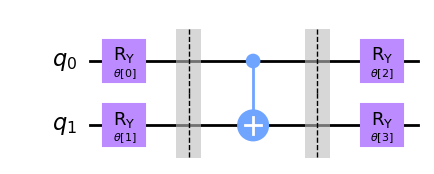

In [112]:
qc = Customize_RealAmplidues(2,1)
qc.draw('mpl')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13620\1835727400.py:2: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  qc = qc.bind_parameters({theta: inittial_point[i] for i, theta in enumerate(qc.parameters)})


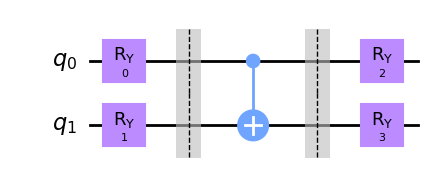

In [114]:
inittial_point = np.array([0,1,2,3])
qc = qc.bind_parameters({theta: inittial_point[i] for i, theta in enumerate(qc.parameters)})
qc.draw('mpl')

In [37]:
CoByla_ReAm_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
CoByla_SU2_13_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_SU2_13_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=13, reps=1, exchange_interaction=1, external_field=2, times=0)

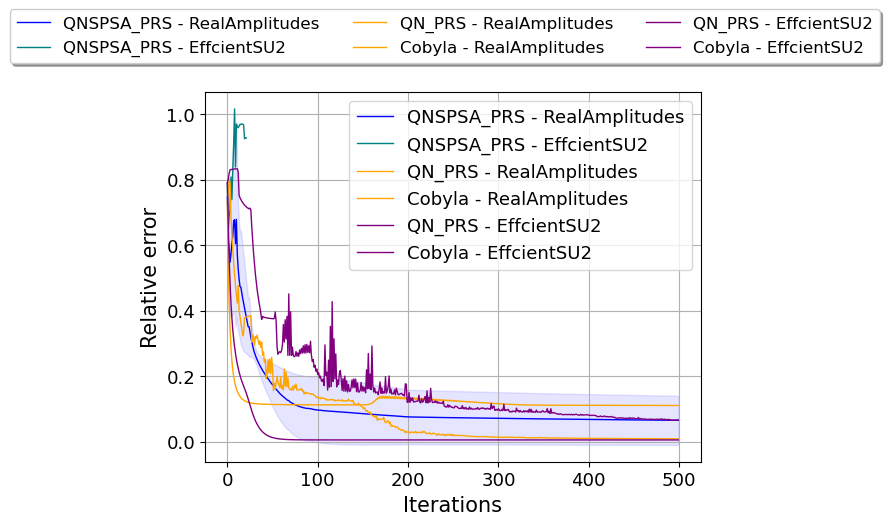

In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_13_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(13, 1, 2))).eigenvalues.real[0]
interation = 500

fig, ax = plt.subplots()

x = np.arange(0, interation)



plt.plot(abs((QNG_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, label='QN_PRS - RealAmplitudes')  
plt.plot(abs((CoByla_ReAm_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='orange', lw=1, alpha=1, label='Cobyla - RealAmplitudes')  
plt.plot(abs((QNG_SU2_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=1, label='QN_PRS - EffcientSU2')  
plt.plot(abs((CoByla_SU2_13_500_J1h2-gs_energy_13_J1_h2)/gs_energy_13_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
plt.legend(fontsize=13)

plt.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
fig.savefig('./Figure/Figure2 - 13 -Compared ReAm and EffSU2-.png', format='png', dpi=600)

12 qubit

In [11]:
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
CoByla_SU2_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_SU2_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

QNSPSA_PRS_ReAm_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_ReAm_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_ReAm_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_ReAm_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)
QNSPSA_PRS_ReAm_12_500_J1h2_6 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=5)
QNSPSA_PRS_ReAm_12_500_J1h2_7 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=6)

QNSPSA_PRS_SU2_12_500_J1h2_1 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSA_PRS_SU2_12_500_J1h2_2 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=1)
QNSPSA_PRS_SU2_12_500_J1h2_3 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=2)
QNSPSA_PRS_SU2_12_500_J1h2_4 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=3)
QNSPSA_PRS_SU2_12_500_J1h2_5 = open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EffcientSU2", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=4)

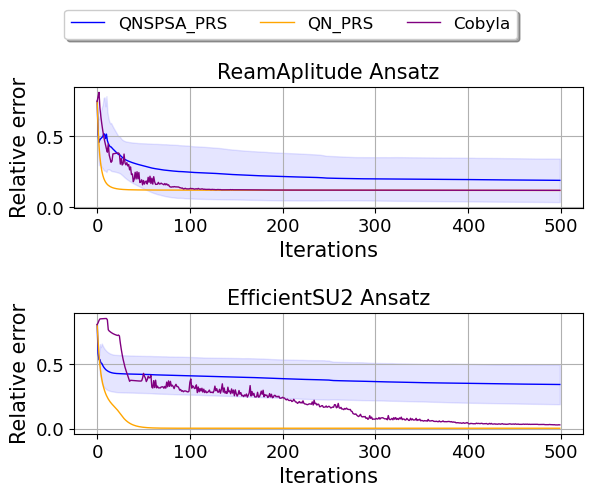

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, (ax0,ax1) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 3]})

x = np.arange(0, interation)

mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_ReAm_12_500_J1h2_1[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_2[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_3[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_4[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_5[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_6[0:interation], QNSPSA_PRS_ReAm_12_500_J1h2_7[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


ax0.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PRS')  
ax0.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)



ax0.plot(abs((QNG_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PRS')  
ax0.plot(abs((CoByla_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla')  


mean_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.mean(np.array([QNSPSA_PRS_SU2_12_500_J1h2_1[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_2[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_3[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_4[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_5[0:interation]]), axis=0) -gs_energy_12_J1_h2)/gs_energy_12_J1_h2)
std_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.std(np.array([QNSPSA_PRS_SU2_12_500_J1h2_1[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_2[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_3[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_4[0:interation], QNSPSA_PRS_SU2_12_500_J1h2_5[0:interation]]), axis=0) )/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', lw=1)  
ax1.fill_between(x, mean_QNSPSA_PRS_SU2_12_500_J1h2+std_QNSPSA_PRS_SU2_12_500_J1h2, mean_QNSPSA_PRS_SU2_12_500_J1h2-std_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', alpha=.1)

ax1.plot(abs((QNG_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1) #, label='QN_PRS - EffcientSU2')  
ax1.plot(abs((CoByla_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1) #, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
textlabel = 15
ax0.set_ylabel('Relative error', fontsize=textlabel)
ax0.set_xlabel('Iterations', fontsize=textlabel)
ax1.set_ylabel('Relative error', fontsize=textlabel)
ax1.set_xlabel('Iterations', fontsize=textlabel)
ax0.set_title('ReamAplitude Ansatz', fontsize=textlabel)
ax1.set_title('EfficientSU2 Ansatz', fontsize=textlabel)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')


ax0.grid()
ax1.grid()
size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.ylim((0,0.05))
fig.tight_layout(pad=2.0)
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=3, fancybox=True, shadow=True, fontsize=12)
# plt.title("Figure 2: Compare Reamplitudes and EffcientSU2 ansatz", y = -1)
fig.savefig('./Figure/Figure2 - 12 -Compared ReAm and EffSU2-.png', format='png', dpi=600, bbox_inches='tight')

In [70]:
QNSPSA_PRS_ReAm_12_500_J1h0 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h0_2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h0_4 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.4, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h0_6 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.6, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h0_8 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0.8, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h1 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h1_2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h1_4 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.4, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h1_6 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.6, times=i) for i in range(5)]
QNSPSA_PRS_ReAm_12_500_J1h1_8 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.8, times=i) for i in range(5)]
QNSPSA_PRS_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]

QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h1_8 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.8, times=0)
QNG_ReAm_12_500_J1h1_6 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=1.6, times=0)

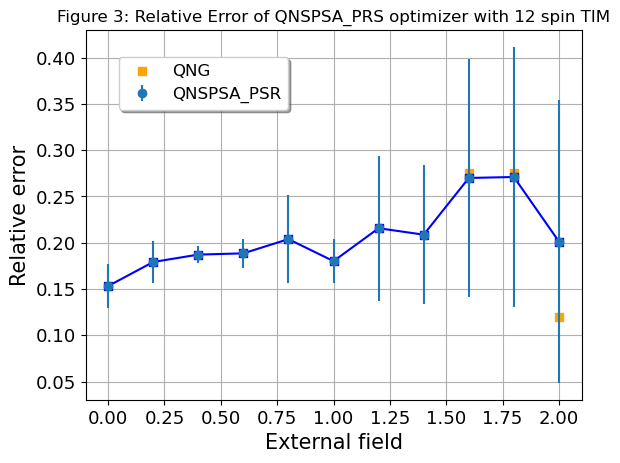

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

interation = 300

fig, ax = plt.subplots()

gs_energy_12_J1_h0 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0))).eigenvalues.real[0]
gs_energy_12_J1_h0_2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.2))).eigenvalues.real[0]
gs_energy_12_J1_h0_4 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.4))).eigenvalues.real[0]
gs_energy_12_J1_h0_6 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.6))).eigenvalues.real[0]
gs_energy_12_J1_h0_8 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0.8))).eigenvalues.real[0]
gs_energy_12_J1_h1 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1))).eigenvalues.real[0]
gs_energy_12_J1_h1_2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.2))).eigenvalues.real[0]
gs_energy_12_J1_h1_4 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.4))).eigenvalues.real[0]
gs_energy_12_J1_h1_6 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.6))).eigenvalues.real[0]
gs_energy_12_J1_h1_8 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 1.8))).eigenvalues.real[0]
gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]

# h = 0
mean_QNSPSA_PRS_ReAm_12_500_J1h0 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h0 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0))], axis=0))/gs_energy_12_J1_h0)

# h = 0.2
mean_QNSPSA_PRS_ReAm_12_500_J1h0_2 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h0_2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_2))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h0_2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h0_2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_2))], axis=0))/gs_energy_12_J1_h0_2)

# # h = 0.4
mean_QNSPSA_PRS_ReAm_12_500_J1h0_4 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h0_4[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_4))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h0_4 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h0_4[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_4))], axis=0))/gs_energy_12_J1_h0_4)

# # h = 0.6
mean_QNSPSA_PRS_ReAm_12_500_J1h0_6 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h0_6[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_6))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h0_6 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h0_6[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_6))], axis=0))/gs_energy_12_J1_h0_6)

# # # h = 0.8
mean_QNSPSA_PRS_ReAm_12_500_J1h0_8 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h0_8[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_8))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h0_8 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h0_8[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h0_8))], axis=0))/gs_energy_12_J1_h0_8)

# # h = 1
mean_QNSPSA_PRS_ReAm_12_500_J1h1 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h1[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h1 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h1[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1))], axis=0))/gs_energy_12_J1_h1)

# # h = 1.2
mean_QNSPSA_PRS_ReAm_12_500_J1h1_2 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h1_2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_2))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h1_2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h1_2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_2))], axis=0))/gs_energy_12_J1_h1_2)

# #  h = 1.4
mean_QNSPSA_PRS_ReAm_12_500_J1h1_4 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h1_4[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_4))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h1_4 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h1_4[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_4))], axis=0))/gs_energy_12_J1_h1_4)

# # h = 1.6
mean_QNSPSA_PRS_ReAm_12_500_J1h1_6 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h1_6[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_6))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h1_6 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h1_6[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_6))], axis=0))/gs_energy_12_J1_h1_6)

# # h = 1.8
mean_QNSPSA_PRS_ReAm_12_500_J1h1_8 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h1_8[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_8))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h1_8 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h1_8[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h1_8))], axis=0))/gs_energy_12_J1_h1_8)

# # h = 2
mean_QNSPSA_PRS_ReAm_12_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


y_standard_deviation = np.array([std_QNSPSA_PRS_ReAm_12_500_J1h0[-1], std_QNSPSA_PRS_ReAm_12_500_J1h0_2[-1], std_QNSPSA_PRS_ReAm_12_500_J1h0_4[-1], std_QNSPSA_PRS_ReAm_12_500_J1h0_6[-1], std_QNSPSA_PRS_ReAm_12_500_J1h0_8[-1], std_QNSPSA_PRS_ReAm_12_500_J1h1[-1], std_QNSPSA_PRS_ReAm_12_500_J1h1_2[-1], std_QNSPSA_PRS_ReAm_12_500_J1h1_4[-1], std_QNSPSA_PRS_ReAm_12_500_J1h1_6[-1], std_QNSPSA_PRS_ReAm_12_500_J1h1_8[-1], std_QNSPSA_PRS_ReAm_12_500_J1h2[-1]])

distance = np.linspace(0,2,11)

relative_error_energy_QNSPSA_PRS = np.array([abs((mean_QNSPSA_PRS_ReAm_12_500_J1h0[-1]-gs_energy_12_J1_h0)/gs_energy_12_J1_h0), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h0_2[-1]-gs_energy_12_J1_h0_2)/gs_energy_12_J1_h0_2), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h0_4[-1]-gs_energy_12_J1_h0_4)/gs_energy_12_J1_h0_4), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h0_6[-1]-gs_energy_12_J1_h0_6)/gs_energy_12_J1_h0_6), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h0_8[-1]-gs_energy_12_J1_h0_8)/gs_energy_12_J1_h0_8), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h1[-1] -gs_energy_12_J1_h1)/gs_energy_12_J1_h1), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h1_2[-1]-gs_energy_12_J1_h1_2)/gs_energy_12_J1_h1_2), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h1_4[-1]-gs_energy_12_J1_h1_4)/gs_energy_12_J1_h1_4), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h1_6[-1]-gs_energy_12_J1_h1_6)/gs_energy_12_J1_h1_6), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h1_8[-1]-gs_energy_12_J1_h1_8)/gs_energy_12_J1_h1_8), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h2[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)])

plt.plot(distance, relative_error_energy_QNSPSA_PRS,  marker='s', color='blue')
plt.scatter([1.6,1.8, 2], [abs((QNG_ReAm_12_500_J1h1_6[-1]-gs_energy_12_J1_h1_6)/gs_energy_12_J1_h1_6), abs((QNG_ReAm_12_500_J1h1_8[-1]-gs_energy_12_J1_h1_8)/gs_energy_12_J1_h1_8), abs((QNG_ReAm_12_500_J1h2[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)], marker='s', label='QNG', color='orange')
plt.errorbar(distance, relative_error_energy_QNSPSA_PRS, yerr = y_standard_deviation, fmt ='s', label='QNSPSA_PRS')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('External field', fontsize=15)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
plt.legend(loc='upper left' ,bbox_to_anchor=(0.05, 0.95),  ncol=1, fancybox=True, shadow=True, fontsize=12)
plt.title('Figure 3: Relative Error of QNSPSA_PRS optimizer with 12 spin TIM')
fig.savefig('./Figure/Figure3-12-ReAm-QNSPSA_PRS.png', format='png', dpi=600, bbox_inches='tight')

In [7]:
QNSPSA_PRS_ReAm_3_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=3, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_4_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=4, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_5_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=5, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_6_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=6, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_7_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=7, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_8_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=8, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_9_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=9, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_10_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=10, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_11_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=11, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=i) for i in range(7)]

QNG_ReAm_7_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=7, reps=1, exchange_interaction=1, external_field=2, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=2, times=0)

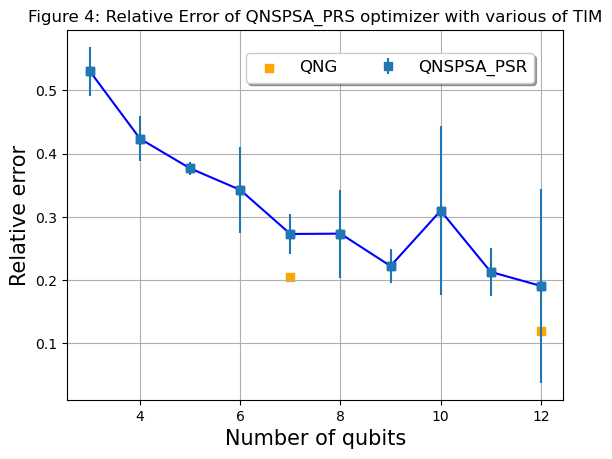

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

interation = 500

fig, ax = plt.subplots()

gs_energy_3_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(3, 1, 2))).eigenvalues.real[0]
gs_energy_4_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(4, 1, 2))).eigenvalues.real[0]
gs_energy_5_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(5, 1, 2))).eigenvalues.real[0]
gs_energy_6_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(6, 1, 2))).eigenvalues.real[0]
gs_energy_7_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(7, 1, 2))).eigenvalues.real[0]
gs_energy_8_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(8, 1, 2))).eigenvalues.real[0]
gs_energy_9_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(9, 1, 2))).eigenvalues.real[0]
gs_energy_10_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(10, 1, 2))).eigenvalues.real[0]
gs_energy_11_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(11, 1, 2))).eigenvalues.real[0]
gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]

# Ising = 3
mean_QNSPSA_PRS_ReAm_3_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_3_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_3_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_3_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_3_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_3_500_J1h2))], axis=0))/gs_energy_3_J1_h2)

# Ising = 4
mean_QNSPSA_PRS_ReAm_4_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_4_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_4_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_4_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_4_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_4_500_J1h2))], axis=0))/gs_energy_4_J1_h2)

# Ising = 5
mean_QNSPSA_PRS_ReAm_5_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_5_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_5_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_5_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_5_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_5_500_J1h2))], axis=0))/gs_energy_5_J1_h2)

# Ising = 6
mean_QNSPSA_PRS_ReAm_6_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_6_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_6_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_6_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_6_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_6_500_J1h2))], axis=0))/gs_energy_6_J1_h2)

# Ising = 7
mean_QNSPSA_PRS_ReAm_7_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_7_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_7_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_7_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_7_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_7_500_J1h2))], axis=0))/gs_energy_7_J1_h2)

# Ising = 8
mean_QNSPSA_PRS_ReAm_8_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_8_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_8_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_8_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_8_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_8_500_J1h2))], axis=0))/gs_energy_8_J1_h2)

# Ising = 9
mean_QNSPSA_PRS_ReAm_9_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_9_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_9_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_9_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_9_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_9_500_J1h2))], axis=0))/gs_energy_9_J1_h2)

# Ising = 10
mean_QNSPSA_PRS_ReAm_10_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_10_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_10_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_10_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_10_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_10_500_J1h2))], axis=0))/gs_energy_10_J1_h2)

# Ising = 11
mean_QNSPSA_PRS_ReAm_11_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_11_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_11_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_11_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_11_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_11_500_J1h2))], axis=0))/gs_energy_11_J1_h2)

# Ising = 12
mean_QNSPSA_PRS_ReAm_12_500_J1h2 = np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

distance = np.linspace(3,12,10)

relative_error_energy_QNSPSA_PRS = np.array([abs((mean_QNSPSA_PRS_ReAm_3_500_J1h2[-1]-gs_energy_3_J1_h2)/gs_energy_3_J1_h2), abs((mean_QNSPSA_PRS_ReAm_4_500_J1h2[-1]-gs_energy_4_J1_h2)/gs_energy_4_J1_h2), abs((mean_QNSPSA_PRS_ReAm_5_500_J1h2[-1]-gs_energy_5_J1_h2)/gs_energy_5_J1_h2), abs((mean_QNSPSA_PRS_ReAm_6_500_J1h2[-1]-gs_energy_6_J1_h2)/gs_energy_6_J1_h2), abs((mean_QNSPSA_PRS_ReAm_7_500_J1h2[-1]-gs_energy_7_J1_h2)/gs_energy_7_J1_h2), abs((mean_QNSPSA_PRS_ReAm_8_500_J1h2[-1]-gs_energy_8_J1_h2)/gs_energy_8_J1_h2), abs((mean_QNSPSA_PRS_ReAm_9_500_J1h2[-1]-gs_energy_9_J1_h2)/gs_energy_9_J1_h2), abs((mean_QNSPSA_PRS_ReAm_10_500_J1h2[-1]-gs_energy_10_J1_h2)/gs_energy_10_J1_h2), abs((mean_QNSPSA_PRS_ReAm_11_500_J1h2[-1]-gs_energy_11_J1_h2)/gs_energy_11_J1_h2), abs((mean_QNSPSA_PRS_ReAm_12_500_J1h2[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)])

y_standard_deviation = np.array([std_QNSPSA_PRS_ReAm_3_500_J1h2[-1], std_QNSPSA_PRS_ReAm_4_500_J1h2[-1], std_QNSPSA_PRS_ReAm_5_500_J1h2[-1], std_QNSPSA_PRS_ReAm_6_500_J1h2[-1], std_QNSPSA_PRS_ReAm_7_500_J1h2[-1], std_QNSPSA_PRS_ReAm_8_500_J1h2[-1], std_QNSPSA_PRS_ReAm_9_500_J1h2[-1], std_QNSPSA_PRS_ReAm_10_500_J1h2[-1], std_QNSPSA_PRS_ReAm_11_500_J1h2[-1], std_QNSPSA_PRS_ReAm_12_500_J1h2[-1]])


plt.errorbar(np.linspace(3,12,10), relative_error_energy_QNSPSA_PRS, yerr = y_standard_deviation, fmt ='s', label='QNSPSA_PRS')

plt.plot(distance, relative_error_energy_QNSPSA_PRS,  marker='s', color='blue')
plt.ylabel('Relative error', fontsize=15)
plt.xlabel('Number of qubits', fontsize=15)

plt.scatter([7,12], [abs((QNG_ReAm_7_500_J1h2[-1]-gs_energy_7_J1_h2)/gs_energy_7_J1_h2), abs((QNG_ReAm_12_500_J1h2[-1]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2)], marker='s', label='QNG', color='orange')

# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
plt.legend(loc='upper center' ,bbox_to_anchor=(0.65, 0.96),  ncol=3, fancybox=True, shadow=True, fontsize=12)
plt.title('Figure 4: Relative Error of QNSPSA_PRS optimizer with various of TIM')
fig.savefig('./Figure/Figure4-ReAm-QNSPSA_PRS_Qubit.png', format='png', dpi=600, bbox_inches='tight')

In [38]:
from qiskit import QuantumCircuit
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    # Perpare the circuit
    num_qubits = circ1.num_qubits
    circ = QuantumCircuit(2*num_qubits+1) # Plus one for the ancilla qubit

    circ = circ.compose(circ1, [i for i in range(1, num_qubits+1)])
    circ = circ.compose(circ2, [i for i in range(num_qubits+1, num_qubits*2+1)])
    circ.barrier()

    circ.h(0)

    for i in range(1, num_qubits+1):
        circ.cswap(0, i, i+num_qubits)

    circ.h(0)  

    overlap_value = 1 - 2*Statevector(circ).probabilities([0])[1]
    
    return overlap_value, circ

In [70]:
circuit1 = QuantumCircuit(12)
circuit1.h(_ for _ in range(12))
circuit1.cx(0, range(1,11))
circuit2 = QuantumCircuit(12)
circuit2.x(_ for _ in range(3,11))
circuit2.cx(11,range(3,10))

In [71]:
backend = Aer.get_backend('statevector_simulator')
job1 = backend.run(circuit1)
vector1 = np.matrix(job1.result().get_statevector())
job2 = backend.run(circuit2)
vector2 = np.matrix(job2.result().get_statevector())
print(vector1)
print(vector2)

[[0.015625+0.j 0.015625+0.j 0.015625+0.j ... 0.015625+0.j 0.015625+0.j
  0.015625+0.j]]
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [78]:
(np.array(vector1)[0] @ np.array(vector2)[0])**2

(0.0002441406250000001+0j)

In [75]:
value, circuit = SwapTest(circuit1, circuit2)
print(value)


0.000244140625000111


In [33]:
def Separate_Circuit_Apart(ansatz):
    # Divide the circuit to subcircuit of parameter circuit and non parameter circuit
    """
    Note that Separate circuit ansatz just works with the custom ansatz, and not work well with the qiskit ansatz
    """
    super_circuit = []
    no_name = 0

    ansatz_barrier = 0 

    for i in range(len(ansatz)):
        if ansatz[i].operation.name == 'barrier':
            ansatz_barrier += 1


    while no_name < (ansatz.size() + ansatz_barrier):
        if ansatz[no_name].operation.params:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            for i in range(no_name, ansatz.num_qubits + no_name):
                sub_circuit.append(ansatz[i])
            super_circuit.append(sub_circuit)
            no_name += ansatz.num_qubits 
            
        elif ansatz[no_name].operation.name == 'barrier':
            no_name += 1
            
        else:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            
            while not ansatz[no_name].operation.params:
                if ansatz[no_name].operation.name == 'barrier':
                    no_name += 1
                    break
                sub_circuit.append(ansatz[no_name])
                no_name += 1 

                if no_name == (ansatz.size() + ansatz_barrier - 1):
                    break

            super_circuit.append(sub_circuit)
    return super_circuit


def Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    parameter: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    
    
    energy = []
    internal_initial_point = initial_point.copy()

    super_circuit = Separate_Circuit_Apart(ansatz)
    

    for i in range(interation):
        internal_ansatz = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})       
        # Measure the expectation of our hamiltonian
        internal_energy = Transverse_Ising_Measurement(operator, internal_ansatz, shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')

        if callback is not None:
            callback(internal_initial_point, internal_energy)


        fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
        # Measure the fubini-study metric
        for i in range(len(super_circuit)):
            if super_circuit[i][0].operation.params:
                g_internal = [[[] for _ in range(super_circuit[i].num_parameters)] for _ in range(super_circuit[i].num_parameters)]
                internal_circuit = QuantumCircuit(super_circuit[i].num_qubits)

                parameter_previous = 0
                for j in range(i):
                    parameter_previous += super_circuit[j].num_parameters
                    internal_circuit = internal_circuit.compose(super_circuit[j])
                # print(parameter_previous)
                

                internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
                
                # Add string
                string = ['I']*ansatz.num_qubits

                for l in range(super_circuit[i].num_parameters):
                    if super_circuit[i][l].operation.name == 'rx':
                        string[l] = 'X'
                    if super_circuit[i][l].operation.name == 'ry':
                        string[l] = 'Y'
                    if super_circuit[i][l].operation.name == 'rz':
                        string[l] = 'Z'

                quantum_circuit_to_meausurement = QuantumCircuit(ansatz.num_qubits)

                for l in range(len(string)):
                    if string[l] == "X":
                        quantum_circuit_to_meausurement.h(l)
                    if string[l] == "Y":
                        quantum_circuit_to_meausurement.rx(np.pi/2, l)
                    
                
                quantum_circuit = internal_circuit.compose(quantum_circuit_to_meausurement)
                quantum_circuit.measure_all()
                # print('string: ', string)
                # print(quantum_circuit)
                job = sampler.run(quantum_circuit, shots = shots)

                result = (job.result().quasi_dists[0].binary_probabilities())
                # print(result)
                # term 2 in fubini-study
                term2 = np.zeros(len(string))
                for l in range(super_circuit[i].num_parameters):
                    expectation_value = 0
                    position_of_non_I_gate = [(ansatz.num_qubits - 1) - l]
                    for m in range(len(result)):
                        extra_minus = 1
                        for n in range(len(position_of_non_I_gate)):
                            if (list(result.keys()))[m][position_of_non_I_gate[n]] == '1':
                                extra_minus *= -1
                        expectation_value += result[list(result.keys())[m]]*extra_minus
                    term2[l] = expectation_value

                # print('term2:', term2)
                
                
                for l in range(super_circuit[i].num_parameters):
                    for m in range(l, super_circuit[i].num_parameters):
                        if l == m:
                            fubini_study_metric[l + parameter_previous, l + parameter_previous] = (1 - term2[l]**2)/4
                        else:

                            term1_lm = 0
                            position_of_non_I_gate = [(ansatz.num_qubits - 1) - l, (ansatz.num_qubits - 1) - m]
                            for h in range(len(result)):
                                extra_minus = 1
                                for n in range(len(position_of_non_I_gate)):
                                    if (list(result.keys()))[h][position_of_non_I_gate[n]] == '1':
                                        extra_minus *= -1
                                term1_lm += result[list(result.keys())[h]]*extra_minus
                            
                            fubini_study_metric[l + parameter_previous, m + parameter_previous] = (term1_lm - term2[l]*term2[m])/4
                            fubini_study_metric[m + parameter_previous, l + parameter_previous] = fubini_study_metric[l + parameter_previous, m + parameter_previous]
                # print(fubini_study_metric)
                # print(internal_circuit)
                        


    
        # Exact Gradient of the cost function
        grad = np.zeros(ansatz.num_parameters)
        for i in range(ansatz.num_parameters):
            plus_parameter = internal_initial_point.copy()
            plus_parameter[i] += np.pi/2
            minus_parameter = internal_initial_point.copy()
            minus_parameter[i] -= np.pi/2
            grad[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2

    
    
        print(fubini_study_metric)
        FS_metric_inv = np.linalg.pinv(fubini_study_metric)
        # print(FS_metric_inv)
        # print(grad)

        combine = learning_rate*FS_metric_inv.dot(grad)

        internal_initial_point =  np.subtract(internal_initial_point, combine)
    
    if callback is None:
        return energy

In [16]:
def matrix_power(matrix, coeff):
    eigen_value, eigen_vector = eig(matrix)

    diagonalize_matrix = np.linalg.pinv(eigen_vector) @ matrix @ eigen_vector

    diagonalize_matrix = np.diag(diagonalize_matrix)

    # print(len(diagonalize_matrix))
    # print(diagonalize_matrix)

    record_matrix = []

    # print(diagonalize_matrix)

    for i in range(len(eigen_vector)):
        # if diagonalize_matrix[i] == 0:
        #     record_matrix.append(0)
        #     continue
        # print(np.complex(diagonalize_matrix[i])**(0.1)) 
        
        record_matrix.append((diagonalize_matrix[i]+0j)**coeff)

    # print(f'record_matrix: {record_matrix}')

    diagonalize_matrix = np.diag(record_matrix)

    return np.array(eigen_vector @ diagonalize_matrix @ np.linalg.pinv(eigen_vector))

    
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    # Perpare the circuit
    num_qubits = circ1.num_qubits
    circ = QuantumCircuit(2*num_qubits+1) # Plus one for the ancilla qubit

    circ = circ.compose(circ1, [i for i in range(1, num_qubits+1)])
    circ = circ.compose(circ2, [i for i in range(num_qubits+1, num_qubits*2+1)])
    circ.barrier()

    circ.h(0)

    for i in range(1, num_qubits+1):
        circ.cswap(0, i, i+num_qubits)

    circ.h(0)  

    overlap_value = 1 - 2*Statevector(circ).probabilities([0])[1]
    
    return overlap_value, circ

    

def Customize_QNSPSA_PRS_blocking(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    interation: number of interation
    initial_point: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    beta = 0.001

    internal_initial_point = initial_point.copy()

    history_length = 5

    last_n_steps = np.zeros(history_length)

    energy = []

    regularized_fubini_matrix_previous = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    grad = np.zeros(ansatz.num_parameters)
    # first measurement outside
    internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
    energy.append(internal_energy)
    #print(internal_energy)
    #print(f'{internal_initial_point} ---------')
    if callback is not None:
        callback(internal_initial_point, internal_energy)
    
    last_n_steps[0] = internal_energy

    for k in range(interation-1):   
        next_energy = 0

        gradPRS = np.zeros(ansatz.num_parameters)
        for i in range(ansatz.num_parameters):
            plus_parameter = internal_initial_point.copy()
            plus_parameter[i] += np.pi/2
            minus_parameter = internal_initial_point.copy()
            minus_parameter[i] -= np.pi/2
            gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2
        # params = []
        # gradPRS = np.zeros(ansatz.num_parameters)

        # for i in range(ansatz.num_parameters):
        #     params.append((i, np.pi/2, 1, internal_initial_point, operator, learning_rate, ansatz, shots, sampler))

        # import concurrent.futures
        # executor = concurrent.futures.ProcessPoolExecutor()
        # gradPRS = list(executor.map(mini_derivate, params))

        # print('gradPRS: ', gradPRS)

        monte_carlo_matrix = []

        while True:    
            grad = np.zeros(ansatz.num_parameters)
            ck = 0.01
            ak = learning_rate
            # Natural Gradient Part
            random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
            # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
            initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
            initial_plus1 = np.add(internal_initial_point, ck*random1)
            initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
            initial_minus1 = np.subtract(internal_initial_point, ck*random1)

            ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

            deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]


            # print(deltaF)
            # Fubini_matrix
            fubini_matrix = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
            
            # monte_carlo_matrix.append(fubini_matrix)
            # exponentially_smoothed_fubini  = fubini_matrix

            # Data of previous regularized study metric
            exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*fubini_matrix.copy()    
            # exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*np.array(np.mean(monte_carlo_matrix, axis=0)) 
            regularized_fubini_matrix = np.add(matrix_power(np.dot(exponentially_smoothed_fubini,exponentially_smoothed_fubini), 1/2).real, beta*np.identity(ansatz.num_parameters))

            # regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()

            grad = ak*np.linalg.pinv(regularized_fubini_matrix).dot(gradPRS)

            
            # cập nhật tham số
            internal_initial_point_while = np.subtract(internal_initial_point, grad)
            tolerance = 2 * last_n_steps.std() if (k > history_length) else 2 * last_n_steps[:k+1].std()
            next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)

            #print(f'tolerance: {tolerance}')
            # print('gradPRS: ', gradPRS)
            #print(next_energy)

            if next_energy <= internal_energy + tolerance:
                break

            # if True:
                # break            

        
        regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()
        
        # ghi data
        internal_initial_point = np.subtract(internal_initial_point, grad)
        internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')
        # print(f'gradSPSA {gradSPSA}')
        # print(f'regularized_fubini_matrix: {np.linalg.pinv(regularized_fubini_matrix)}')

        if callback is not None:
            callback(internal_initial_point, internal_energy)

        last_n_steps[(k+1) % history_length] = internal_energy
    return energy

In [ ]:
def Customize_QNSPSA_PRS_blocking_MonteCarlo(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    interation: number of interation
    initial_point: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    beta = 0.001

    internal_initial_point = initial_point.copy()

    history_length = 5

    last_n_steps = np.zeros(history_length)

    energy = []

    regularized_fubini_matrix_previous = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    grad = np.zeros(ansatz.num_parameters)
    # first measurement outside
    internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
    energy.append(internal_energy)
    #print(internal_energy)
    #print(f'{internal_initial_point} ---------')
    if callback is not None:
        callback(internal_initial_point, internal_energy)
    
    last_n_steps[0] = internal_energy

    for k in range(interation-1):   
        next_energy = 0

        # gradPRS = np.zeros(ansatz.num_parameters)
        # for i in range(ansatz.num_parameters):
        #     plus_parameter = internal_initial_point.copy()
        #     plus_parameter[i] += np.pi/2
        #     minus_parameter = internal_initial_point.copy()
        #     minus_parameter[i] -= np.pi/2
        #     gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2
        
        params = []
        gradPRS = np.zeros(ansatz.num_parameters)

        for i in range(ansatz.num_parameters):
            params.append((i, np.pi/2, 1, internal_initial_point, operator, learning_rate, ansatz, shots, sampler))

        import concurrent.futures
        executor = concurrent.futures.ProcessPoolExecutor()
        gradPRS = list(executor.map(mini_derivate, params))

        # print('gradPRS: ', gradPRS)

        monte_carlo_matrix = []

        while True:    
            grad = np.zeros(ansatz.num_parameters)
            ck = 0.01
            ak = learning_rate
            # Natural Gradient Part
            random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
            # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
            initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
            initial_plus1 = np.add(internal_initial_point, ck*random1)
            initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
            initial_minus1 = np.subtract(internal_initial_point, ck*random1)

            ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

            deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]


            # print(deltaF)
            # Fubini_matrix
            fubini_matrix = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
            
            monte_carlo_matrix.append(fubini_matrix)
            # exponentially_smoothed_fubini  = fubini_matrix

            # Data of previous regularized study metric
            # exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*fubini_matrix.copy()    
            exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*np.array(np.mean(monte_carlo_matrix, axis=0)) 
            regularized_fubini_matrix = np.add(matrix_power(np.dot(exponentially_smoothed_fubini,exponentially_smoothed_fubini), 1/2).real, beta*np.identity(ansatz.num_parameters))

            # regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()

            grad = ak*np.linalg.pinv(regularized_fubini_matrix).dot(gradPRS)

            
            # cập nhật tham số
            internal_initial_point_while = np.subtract(internal_initial_point, grad)
            tolerance = 2 * last_n_steps.std() if (k > history_length) else 2 * last_n_steps[:k+1].std()
            next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)

            #print(f'tolerance: {tolerance}')
            # print('gradPRS: ', gradPRS)
            #print(next_energy)

            if next_energy <= internal_energy + tolerance:
                break

            # if True:
                # break            

        
        regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()
        
        # ghi data
        internal_initial_point = np.subtract(internal_initial_point, grad)
        internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')
        # print(f'gradSPSA {gradSPSA}')
        # print(f'regularized_fubini_matrix: {np.linalg.pinv(regularized_fubini_matrix)}')

        if callback is not None:
            callback(internal_initial_point, internal_energy)

        last_n_steps[(k+1) % history_length] = internal_energy
    return energy

In [28]:
from qiskit.primitives import Sampler
num_qubits = 4
reps = 1
J = 1
h = 2
sampler = Sampler()
hamiltonian = Ising_hamiltonian(num_qubits, J, h)
ansatz = Customize_RealAmplidues(num_qubits, reps)
# ansatz_name = 'RealAmplidues'
interation = 500
initial_point = np.zeros(ansatz.num_parameters) - 0.5
eta = 0.01
shots = None

intermediate_info = {
    'parameters': [],
    'energy': [],
}
def callback(parameters, energy):
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    print(energy)

np.random.seed(seed=0)
energy = Customize_Quantum_Natural_Gradient_Descent(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)     
# interation = 2
# np.random.seed(seed=10)
# energy = Customize_QNSPSA_PRS_blocking(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)        

C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:60: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_ansatz = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:85: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:161: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.

0.06365032690328043
[[ 2.50000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.50000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.50000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.50000000e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.50000000e-01 -5.04278350e-02 -5.03069808e-17  5.37764278e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.04278350e-02  2.50000000e-01 -5.04278350e-02  4.33680869e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.03069808e-17 -5.04278350e-02  2.50000000e-01  1.05183873e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00

KeyboardInterrupt: 

In [27]:
print(intermediate_info['energy'])

[0.06365032690328043, -5.355639513052648, -5.553711673937519, -5.603055240432749, -5.639041100607495, -5.6733353968069995, -5.709972798579494, -5.753025087920353, -5.80865419724527, -5.887494414903188, -6.009109912944276, -6.208969059512447, -6.540820804525569, -7.036148645270502, -7.579229579070971, -7.934984986062597, -8.08425798857917, -8.150280736664989, -8.188134933677334, -8.213230498430743, -8.231410435460685, -8.245390467391648, -8.256609936272243, -8.265910465726604, -8.273835569811443, -8.280757961470428, -8.286944490643663, -8.292586682751807, -8.297820494006658, -8.302739475726934, -8.307405487540986, -8.311857109908244, -8.316116266615047, -8.3201933075995, -8.324090894294338, -8.327807008432902, -8.331337316017784, -8.334677009767729, -8.337822213812984, -8.340770962578421, -8.34352379010891, -8.346083948496917, -8.348457315695912, -8.350652057285426, -8.352678130457788, -8.354546713161707, -8.356269636267623, -8.357858875659565, -8.359326140649703, -8.36068257257024, -8.

In [ ]:
optimizer = SLSQP(maxiter=100)
estimator = Estimator()
algorithm_globals.random_seed = 50
mapper=JordanWignerMapper()
qubit_op = mapper.map(hamiltonian)
vqe = VQE(estimator = estimator, ansatz = qc, optimizer=optimizer)
computation_value = vqe.compute_minimum_eigenvalue(qubit_op).eigenvalue.real

In [39]:
params = []
num_qubits = 12
optimizes = [Customize_Quantum_Natural_Gradient_Descent, Customize_QNSPSA_PRS_blocking]
external_field = np.linspace(0,2,11)
for k in range(7):
    for i in range(len(external_field)):
        params.append((num_qubits, round(external_field[i],1), optimizes[1], k))

for i in range(len(external_field)):
    params.append((num_qubits, round(external_field[i],1), optimizes[0], 0))

In [41]:
len(params)

88

In [40]:
for i in range(len(params)):
    print(params[i])

(12, 0.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.4, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.6, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.8, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.4, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.6, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.8, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 2.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 1)
(12, 0.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 1)

In [15]:
from qiskit.primitives import Sampler

num_qubits = 3
reps = 1
J = 1
h = 2
sampler = Sampler()


intermediate_info = {
    'parameters': [],
    'energy': [],
}

hamiltonian = Ising_hamiltonian(num_qubits, J, h)
    
ansatz = Customize_RealAmplidues(num_qubits, reps)
ansatz_name = 'RealAmplidues'

#ansatz = Customize_EfficientSU2(num_qubits, reps)
#ansatz_name = 'EffcientSU2'

interation = 500
initial_point = np.zeros(ansatz.num_parameters) - 0.5
eta = 0.01
shots = None

def callback(parameters, energy):
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    print(energy)


energy = Customize_QNSPSA_PRS_blocking(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)        
# energy = Customize_Quantum_Natural_Gradient_Descent(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:80: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:98: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_p

0.6479341368878508


C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:127: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:128: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:129: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_par

-1.0168652845971073
-1.2570055114328762
-1.5652597246512099
-2.0673763387954556
-2.5629886180117105
-3.4809107493140576
-4.272726531667385
-4.736442905386858
-4.839013367481208
-5.439828360071524
-5.575991790959828
-5.752121330757524
-5.872479872972061
-6.0585571146669865
-6.125007389558089
-6.155536343598754
-6.174207530092188
-6.186091070040767
-6.194234550834799
-6.201061701669934
-6.207755122966827
-6.213883583215208
-6.2197161755313575
-6.225285819932104
-6.230550495161275
-6.234961465898555
-6.223727973315016
-6.239151848810604
-6.245663692503348
-6.24553398988148
-6.238208946898752
-6.241149081565736
-6.247077776970995
-6.248684376238325
-6.252347500275942
-6.260364853145013
-6.267205618339605
-6.2712292501287115
-6.274858857147566
-6.2731777883488
-6.279064057659111
-6.281634509649997
-6.283343173395169
-6.284637335311378
-6.285674239726432
-6.286539874701445
-6.2876383361611925
-6.288617094407704
-6.289411241674373
-6.290118236476129
-6.290767337839992
-6.291339215732133
-6.29

KeyboardInterrupt: 

In [30]:
gs_energy_7_J1_h2

-14.892759299704457

In [32]:
print(intermediate_info['energy'])

[-2.0597577698762626, -4.250093227997218, -6.095293350435627, -6.913620349817891, -7.5622177382170594, -7.809238891584198, -8.06405263483767, -8.343491920801409, -8.615483143436645, -8.95942481776484, -9.30369194593013, -9.534981977832965, -9.781905510364725, -10.049440243229796, -10.282652120262854, -10.567320806380174, -10.758517022811375, -10.845595785510195, -10.927395498199559, -10.978812907091449, -11.094058630187343, -11.15657713148191, -11.20503337165528, -11.247720456929347, -11.284065566380058, -11.312043493144843, -11.337158635442544, -11.358911687654821, -11.379045499364198, -11.399435460827693, -11.418216980826987, -11.437823673828873, -11.454541274059684, -11.47034650629288, -11.485635582832508, -11.498765794369607, -11.515029807018694, -11.529636954101967, -11.543195307960822, -11.556595314311775, -11.568842700461083, -11.580123240221381, -11.590466358727042, -11.600042421290112, -11.609026643106493, -11.61746077498661, -11.625434990927841, -11.632710403836782, -11.63945

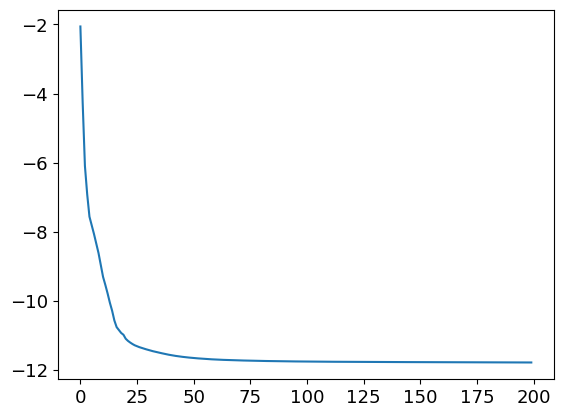

In [33]:
plt.plot(intermediate_info['energy'][0:200])

In [35]:
def Customize_QNSPSA_SPSA_blocking(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    interation: number of interation
    initial_point: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    beta = 0.001
    
    internal_initial_point = initial_point.copy()

    history_length = 5

    last_n_steps = np.zeros(history_length)

    energy = []

    regularized_fubini_matrix_previous = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    grad = np.zeros(ansatz.num_parameters)
    # first measurement outside
    internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
    energy.append(internal_energy)
    #print(internal_energy)
    #print(f'{internal_initial_point} ---------')
    if callback is not None:
        callback(internal_initial_point, internal_energy)
    
    last_n_steps[0] = internal_energy

    for k in range(interation-1):   
        next_energy = 0
        
        monte_carlo_matrix = []
        while True:    
            grad = np.zeros(ansatz.num_parameters)
            # SPSA part
            gradSPSA = np.zeros(ansatz.num_parameters)
            # ak = a/(1+k+A)**alpha
            # ck = c/(1+k)**gamma
            ck = 0.01
            ak = learning_rate
            
            random = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            plus_parameter = np.array(internal_initial_point.copy())
            plus_parameter = np.add(plus_parameter,random*ck)
            minus_parameter = np.array(internal_initial_point.copy())
            minus_parameter = np.subtract(minus_parameter,random*ck)
            gradSPSA = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/(2*(ck))*random
            
            # print(f'gradSPSA {gradSPSA}')

            
            # Natural Gradient Part
            random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
            # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
            initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
            initial_plus1 = np.add(internal_initial_point, ck*random1)
            initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
            initial_minus1 = np.subtract(internal_initial_point, ck*random1)

            ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

            deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] -SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]


            # print(deltaF)
            # Fubini_matrix
            fubini_matrix = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
            monte_carlo_matrix.append(fubini_matrix)
    
            exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*np.array(np.mean(monte_carlo_matrix, axis=0)) 
            # Data of previous regularized study metric
            # exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*fubini_matrix.copy()    
            regularized_fubini_matrix = np.add(matrix_power(np.dot(exponentially_smoothed_fubini,exponentially_smoothed_fubini), 1/2).real, beta*np.identity(ansatz.num_parameters))

            # regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()

            grad = ak*np.linalg.pinv(regularized_fubini_matrix).dot(gradSPSA)

            
            # cập nhật tham số
            internal_initial_point_while = np.subtract(internal_initial_point, grad)
            
            tolerance = 2 * last_n_steps.std() if (k > history_length) else 2 * last_n_steps[:k+1].std()

            #print(f'tolerance: {tolerance}')

            next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)

            if next_energy < internal_energy + tolerance:
                break            

        
        regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()
        
        # ghi data
        internal_initial_point = np.subtract(internal_initial_point, grad)
        internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')
        # print(f'gradSPSA {gradSPSA}')
        # print(f'regularized_fubini_matrix: {np.linalg.pinv(regularized_fubini_matrix)}')

        if callback is not None:
            callback(internal_initial_point, internal_energy)

        last_n_steps[(k+1) % history_length] = internal_energy
    return energy

In [37]:
intermediate_info = {
    'parameters': [],
    'energy': [],
}

def callback(parameters, energy):
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    print(energy)

energy = Customize_QNSPSA_SPSA_blocking(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)       

C:\Users\DELL\AppData\Local\Temp\ipykernel_13620\39545322.py:22: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13620\39545322.py:49: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  gradSPSA = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_param

-2.0597577698762626


C:\Users\DELL\AppData\Local\Temp\ipykernel_13620\39545322.py:95: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13620\39545322.py:105: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)


-3.065359223213022
-3.9920017998924324
-4.215145072425495
-4.233563616221753
-3.7936923403463494
-3.269042861631411
-5.506684700887249
-4.384982954966726
-6.443393353067935
-6.558657637321682
-6.514744122293499
-5.915448792185933
-7.711121192433624
-7.900522475710808
-7.9369115070018825
-7.92260842297043
-8.15971029639849
-9.24360040243376
-9.258103707229685
-9.186464992291047
-9.22776433814381
-9.22801793046474
-9.227939579858548
-9.208434644549943
-9.20722121104745
-9.221431933001867
-9.33711728068724
-9.59021147305965
-9.683096472856775
-9.542962929250631
-9.46915231046421
-9.41748027470656
-9.37905020140166
-9.378559229356474
-9.43734322026368
-9.5752679063417
-9.618281776944482
-9.567003274238457
-9.432301670350927
-9.519117605844608
-9.830272349383398
-9.830818717968882
-9.76576684901079
-9.687942525913458
-9.878484289257191
-9.886795030717233
-9.836697338500606
-9.785927802657827
-9.713828394417943
-9.815162186071706
-9.711917872314661
-9.624834410274262
-9.565322485632437
-9.45

In [38]:
print(intermediate_info['energy'])

[-2.0597577698762626, -3.065359223213022, -3.9920017998924324, -4.215145072425495, -4.233563616221753, -3.7936923403463494, -3.269042861631411, -5.506684700887249, -4.384982954966726, -6.443393353067935, -6.558657637321682, -6.514744122293499, -5.915448792185933, -7.711121192433624, -7.900522475710808, -7.9369115070018825, -7.92260842297043, -8.15971029639849, -9.24360040243376, -9.258103707229685, -9.186464992291047, -9.22776433814381, -9.22801793046474, -9.227939579858548, -9.208434644549943, -9.20722121104745, -9.221431933001867, -9.33711728068724, -9.59021147305965, -9.683096472856775, -9.542962929250631, -9.46915231046421, -9.41748027470656, -9.37905020140166, -9.378559229356474, -9.43734322026368, -9.5752679063417, -9.618281776944482, -9.567003274238457, -9.432301670350927, -9.519117605844608, -9.830272349383398, -9.830818717968882, -9.76576684901079, -9.687942525913458, -9.878484289257191, -9.886795030717233, -9.836697338500606, -9.785927802657827, -9.713828394417943, -9.8151621

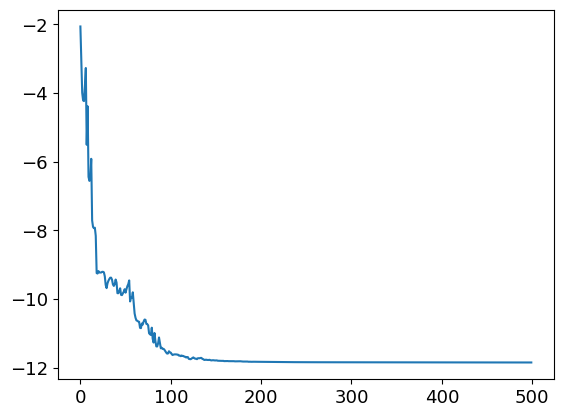

In [39]:
plt.plot(intermediate_info['energy'])

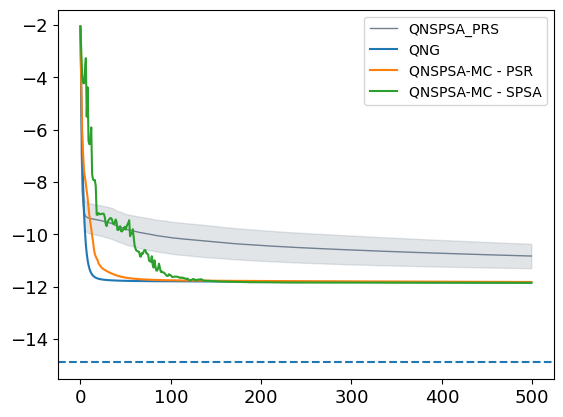

In [92]:
QNG_ReAm_7_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=7, reps=1, exchange_interaction=1, external_field=2, times=0)
QNSPSAMC_PSR_7_500_J1h2 = np.array([-2.0597577698762626, -4.250093227997218, -6.095293350435627, -6.913620349817891, -7.5622177382170594, -7.809238891584198, -8.06405263483767, -8.343491920801409, -8.615483143436645, -8.95942481776484, -9.30369194593013, -9.534981977832965, -9.781905510364725, -10.049440243229796, -10.282652120262854, -10.567320806380174, -10.758517022811375, -10.845595785510195, -10.927395498199559, -10.978812907091449, -11.094058630187343, -11.15657713148191, -11.20503337165528, -11.247720456929347, -11.284065566380058, -11.312043493144843, -11.337158635442544, -11.358911687654821, -11.379045499364198, -11.399435460827693, -11.418216980826987, -11.437823673828873, -11.454541274059684, -11.47034650629288, -11.485635582832508, -11.498765794369607, -11.515029807018694, -11.529636954101967, -11.543195307960822, -11.556595314311775, -11.568842700461083, -11.580123240221381, -11.590466358727042, -11.600042421290112, -11.609026643106493, -11.61746077498661, -11.625434990927841, -11.632710403836782, -11.639454435822218, -11.645822247955506, -11.651829758724798, -11.657540217816972, -11.662876493900669, -11.66788578376335, -11.672624246501936, -11.67730536677396, -11.681718161236075, -11.685832638066326, -11.689722459612256, -11.69332649021418, -11.696644366917935, -11.699483474235166, -11.702443585774683, -11.705161759474294, -11.70760565130023, -11.709939837528168, -11.712158522559143, -11.714300132902538, -11.716373013868397, -11.718399293835397, -11.72036461045108, -11.722187004720203, -11.723972047694758, -11.7256949653571, -11.727372480298946, -11.728968156346989, -11.730477152545166, -11.731928025571722, -11.733322244647281, -11.73467100403753, -11.735980579893885, -11.737241044591896, -11.738457875863501, -11.739644970683706, -11.740776563586154, -11.74188688625416, -11.742930226786854, -11.742561598428473, -11.742897395676454, -11.745915960207666, -11.746164908454901, -11.746733713043927, -11.748578098765043, -11.749402742081427, -11.750179495905298, -11.75092429059324, -11.751666090666578, -11.752378839457464, -11.753056247283794, -11.753640782090956, -11.75434988526819, -11.754994143669585, -11.755602648336593, -11.756187080736487, -11.756732122576821, -11.7572582450189, -11.757769981077612, -11.758265099951572, -11.758733860807915, -11.759184683241793, -11.75963307560031, -11.760055572088747, -11.76045660430117, -11.760849248287952, -11.761232206903689, -11.76160659009194, -11.761959305586956, -11.76230567820445, -11.762650297285294, -11.762984062921703, -11.763313483864847, -11.76363742784769, -11.763954433625525, -11.764264559655052, -11.764569353494432, -11.764863567519722, -11.765155433045782, -11.765445118727738, -11.765731461616632, -11.766015241815683, -11.766294447509292, -11.766574507509791, -11.766846794238344, -11.767116134915366, -11.767380233814693, -11.767641339641822, -11.767901471990726, -11.768166304521401, -11.768427622876153, -11.76868655842781, -11.76894418983723, -11.769197318279627, -11.769446808216003, -11.769693280713176, -11.769936925636433, -11.770176571304773, -11.77041083037999, -11.770646878171075, -11.770879944251417, -11.771110137312352, -11.77133745138506, -11.771563164230079, -11.771786234179276, -11.771986841405898, -11.772211044275023, -11.772430842964695, -11.77264725741494, -11.772862505007572, -11.773075693295961, -11.773287299318119, -11.773497707769943, -11.77371170087611, -11.77392340328263, -11.774130896705811, -11.774336539789893, -11.774540678848597, -11.774743092020419, -11.774943841457592, -11.775143888054945, -11.775343116399362, -11.775539748364562, -11.775733916214175, -11.775920951892065, -11.776106367697878, -11.776292028060489, -11.776476245302064, -11.776660196021538, -11.77684550385723, -11.777041475869721, -11.777239149173337, -11.777440220371588, -11.777636884515212, -11.777833666204973, -11.778029136925744, -11.778224301733465, -11.778416415314025, -11.778605196240507, -11.77878552818416, -11.77896992787156, -11.779153919414984, -11.779337644023762, -11.779519408072717, -11.77969825795485, -11.77987523655214, -11.780052193486753, -11.780232029778777, -11.780409848684915, -11.780590501892442, -11.780771889823043, -11.780949966200303, -11.781128609057298, -11.781305892993268, -11.781481593898686, -11.781655788999387, -11.781828287144368, -11.781998295717939, -11.782170453684186, -11.782341039120883, -11.782514060074408, -11.782686085935918, -11.782859010226565, -11.783030900639497, -11.783202664987133, -11.783375236750597, -11.783544739300975, -11.783712950258082, -11.783880809220435, -11.78404394172614, -11.784205604322647, -11.784369110800988, -11.784542652209188, -11.78471485860599, -11.784886955503156, -11.785051905298005, -11.78521556896928, -11.785373030583806, -11.785532149098406, -11.785690601967964, -11.785848362869679, -11.786005142993192, -11.786164926448233, -11.786322827674626, -11.786480066753192, -11.786636499990344, -11.786792905415203, -11.786949302176891, -11.787104887752886, -11.78726161225078, -11.787414657902472, -11.787566364487926, -11.787719557113673, -11.787871699755943, -11.788024722265215, -11.788176251739369, -11.788325721072141, -11.788467801048842, -11.788608770737012, -11.78874683174875, -11.788884166285149, -11.789021878420145, -11.78915877333342, -11.789294845195188, -11.78942983170606, -11.789564905950783, -11.789699419022519, -11.789835188697039, -11.789970203348634, -11.790107064385484, -11.790243478459214, -11.790375607094685, -11.790508650446942, -11.790642822154993, -11.790776155044716, -11.790908896994683, -11.791041881718222, -11.791173087115421, -11.791304550398731, -11.791433847561642, -11.791562549071205, -11.79169353912505, -11.791823438634882, -11.79195277996199, -11.792083011248401, -11.792222684786601, -11.792361356831856, -11.792499564513786, -11.792637388421872, -11.7927742807174, -11.792910572158583, -11.793046355068004, -11.793181123776836, -11.793314567302858, -11.79344841836888, -11.793582286422996, -11.793715351182325, -11.793848044422038, -11.793977848888897, -11.794107376209022, -11.794235820766932, -11.794363912436449, -11.79449095904053, -11.79461841275172, -11.794746163511181, -11.794874008924658, -11.795001344587938, -11.795129375207672, -11.795257237104657, -11.795385314036158, -11.795512222873086, -11.795639019830443, -11.795766177760683, -11.79589306770462, -11.796019264981727, -11.796142476798444, -11.79626574074117, -11.79638768572656, -11.796508957039268, -11.79662983488743, -11.796750840524588, -11.796872078626407, -11.796993145162359, -11.797116682098716, -11.797239960946769, -11.797362877212386, -11.797486533384069, -11.797605481212155, -11.797725991495481, -11.797845458913704, -11.797962557044706, -11.798082782727391, -11.79820441877624, -11.798326107404002, -11.798447660379072, -11.798568589529575, -11.79868758544903, -11.798805282751337, -11.798921642971651, -11.799037870725904, -11.79915280666963, -11.799267633104684, -11.79938234248759, -11.799496931183779, -11.799611280286305, -11.799725612914688, -11.799837300255012, -11.799948592188922, -11.800059864874068, -11.800172007607246, -11.800283374969322, -11.800394576799789, -11.800504954392487, -11.800615337935684, -11.800724996569802, -11.800834764156432, -11.800943928236515, -11.801052928760464, -11.80116261800164, -11.801272238883463, -11.801382213726455, -11.801492233991773, -11.80160526853966, -11.801718249915147, -11.80183017154518, -11.80194107181656, -11.802051909613763, -11.80216265218681, -11.802273363681447, -11.802382370399306, -11.80248825683822, -11.802594137567388, -11.802700072160732, -11.802806877868107, -11.802913155088811, -11.803019551487933, -11.803125797350825, -11.803231912472546, -11.803337938786212, -11.803443974583185, -11.803550098448941, -11.80365618753496, -11.803762589750946, -11.803869218579583, -11.803975843818211, -11.804082421534606, -11.804189104046028, -11.804296771659034, -11.804403637380837, -11.80451095168477, -11.804618354582875, -11.804726751382375, -11.804835388482259, -11.804944114992065, -11.805052476556012, -11.805161876033182, -11.805271192784966, -11.805380507955181, -11.8054896328892, -11.8055985167475, -11.80570746908916, -11.80581613796992, -11.805924614636142, -11.806033219183565, -11.806143063356838, -11.806253106036992, -11.806363233715409, -11.806473448460329, -11.806583653128975, -11.806694042376868, -11.80680390663939, -11.806914116328732, -11.807024473533314, -11.80713504300781, -11.80724499035324, -11.807355081836748, -11.80746485958854, -11.807575048490293, -11.807685404278944, -11.807795316271733, -11.807905358279893, -11.808015555482879, -11.808127679886123, -11.808239828043806, -11.808351581178817, -11.80846287780134, -11.808574241122999, -11.808685737993551, -11.808797228848594, -11.808908771473732, -11.809020434711506, -11.809132473535154, -11.809244282649743, -11.809356266580075, -11.809468122582839, -11.809580136059193, -11.809693807047385, -11.80980753665251, -11.80992116120654, -11.810035050849933, -11.810148947459737, -11.81026293780311, -11.810376973553442, -11.810491049648268, -11.810605417384176, -11.810719867870493, -11.810834390911626, -11.810950471429743, -11.811064464118218, -11.811178638612425, -11.811293500688102, -11.81140815016834, -11.811522669280969, -11.81163750834844, -11.811752519963989, -11.811867628390676, -11.811982770409454, -11.812097269644404, -11.812211839192466, -11.812326274020858, -11.812441576948581, -11.812556963927781, -11.812672415529903, -11.812788185896766, -11.812903866886089, -11.813017257262791, -11.813132541644416, -11.813247515746903, -11.813362570081598, -11.813477712836201, -11.813592373211678, -11.813707058211682, -11.813821835322111, -11.813936767613578, -11.814049948255953, -11.814163340817684, -11.814276577574276, -11.814389742604655, -11.814501575980108, -11.814613957565879, -11.814726421098348, -11.814838877190223, -11.814951533869442, -11.815063898594907, -11.815175679171755, -11.815287414103304, -11.815399382939507, -11.81551152215366, -11.815624701188817, -11.815737950448124, -11.815851275494214, -11.815964869614652, -11.816078748641226, -11.816193297876547, -11.816307890576363, -11.816423533725683, -11.816539534323192, -11.816655581930316, -11.816771234647312, -11.816887101010831, -11.817003014852277, -11.817118660852415, -11.8172343906609, -11.817350805765928, -11.817467205369327, -11.8175837688062, -11.817700032109167, -11.817816326574546, -11.817932591838025, -11.81804909123005, -11.818165493353899, -11.818281996433896])
QNSPSAMC_SPSA_7_500_J1h2 = np.array([-2.0597577698762626, -3.065359223213022, -3.9920017998924324, -4.215145072425495, -4.233563616221753, -3.7936923403463494, -3.269042861631411, -5.506684700887249, -4.384982954966726, -6.443393353067935, -6.558657637321682, -6.514744122293499, -5.915448792185933, -7.711121192433624, -7.900522475710808, -7.9369115070018825, -7.92260842297043, -8.15971029639849, -9.24360040243376, -9.258103707229685, -9.186464992291047, -9.22776433814381, -9.22801793046474, -9.227939579858548, -9.208434644549943, -9.20722121104745, -9.221431933001867, -9.33711728068724, -9.59021147305965, -9.683096472856775, -9.542962929250631, -9.46915231046421, -9.41748027470656, -9.37905020140166, -9.378559229356474, -9.43734322026368, -9.5752679063417, -9.618281776944482, -9.567003274238457, -9.432301670350927, -9.519117605844608, -9.830272349383398, -9.830818717968882, -9.76576684901079, -9.687942525913458, -9.878484289257191, -9.886795030717233, -9.836697338500606, -9.785927802657827, -9.713828394417943, -9.815162186071706, -9.711917872314661, -9.624834410274262, -9.565322485632437, -9.458711691647377, -10.070259184410526, -9.949971160365882, -9.96203915679218, -9.805323051095817, -10.109378492009112, -10.420848033021178, -10.546253458940532, -10.62366069394977, -10.635198272187166, -10.654595302077318, -10.66445264781296, -10.839690404537109, -10.850227776789444, -10.713343792258705, -10.745130589697208, -10.655681048059998, -10.598481291321674, -10.605549008027964, -10.72360302566231, -10.731618396184476, -10.76857729033021, -10.998172211343729, -11.0270285074086, -11.047611475129242, -10.835687882709946, -11.156135062734693, -11.2684488125409, -10.989997645443495, -11.224404569402871, -11.380463071191485, -11.382234258433936, -11.29254213394088, -11.120686718277726, -11.274297186289735, -11.435726031246372, -11.419039737494698, -11.453553027490972, -11.450880668487311, -11.478965940491298, -11.520313263139617, -11.562580486223592, -11.590567142285316, -11.585434571727188, -11.522108764266545, -11.55482480761227, -11.561428917893748, -11.604223375096868, -11.63144506285707, -11.620275472344227, -11.61337626070737, -11.613770771321335, -11.613211891826445, -11.619072040789778, -11.620334095443889, -11.649255721343941, -11.64669680914374, -11.664666596501139, -11.645823591513889, -11.659699648342285, -11.659106912951088, -11.680460373254293, -11.68257757640947, -11.70464855115187, -11.690644932312814, -11.694683719503104, -11.745581744517507, -11.750378956613442, -11.754255947701498, -11.737509565687386, -11.716391649893064, -11.701766776151612, -11.722740688190692, -11.739396916498846, -11.737103297549549, -11.752989894732519, -11.725048491996372, -11.726524764686332, -11.725022219417193, -11.716365204459086, -11.715590624226222, -11.746858066375761, -11.752866504125615, -11.774885678881, -11.773822127210236, -11.766423529113979, -11.774550538748947, -11.776004059098412, -11.776632315748026, -11.77108260734488, -11.782767505815967, -11.788998126467272, -11.784376989364718, -11.78322673783111, -11.788166991759443, -11.790285003597392, -11.78816077147144, -11.788170496639292, -11.798029432208217, -11.799144940861577, -11.800110701127071, -11.798932464851958, -11.802626883500402, -11.802874256544055, -11.800820210959753, -11.809324299798478, -11.808824352947209, -11.809044630733357, -11.809396922257685, -11.807237625116128, -11.810782594148687, -11.810731047985751, -11.810497986256028, -11.809999295762093, -11.810809958783164, -11.810804932332884, -11.81135665534379, -11.816041910743024, -11.815697709714826, -11.814118555042418, -11.812899837538183, -11.813590558114551, -11.81434875071398, -11.813389977043963, -11.817338096008509, -11.821237974463374, -11.82198986587458, -11.822142866551712, -11.822040832786442, -11.821747716979107, -11.821142778518574, -11.82232634555282, -11.827512219144046, -11.826698698272525, -11.82696251508274, -11.829105235513511, -11.82784353276098, -11.827567798432414, -11.827563309219887, -11.827382047924273, -11.828726390512857, -11.828952896380759, -11.829080380567808, -11.829468179659944, -11.82980043810543, -11.829995972332526, -11.830807847317594, -11.831398994885042, -11.831390448505404, -11.831489541907093, -11.831749934749041, -11.831508356920548, -11.8315125242414, -11.83168506973265, -11.831569001303407, -11.83158298751539, -11.831569525557565, -11.832674532147225, -11.832714639278196, -11.832712234407575, -11.832493003307079, -11.834028230417008, -11.834398532903139, -11.834281608953642, -11.83377969220193, -11.835362252068222, -11.835207496144196, -11.836239457474463, -11.836133762079882, -11.8362982786986, -11.837116124882122, -11.837309022156877, -11.838457749834513, -11.838476906529037, -11.838418729141452, -11.838341472881273, -11.83935333815123, -11.839387498570098, -11.839225183669095, -11.839361783093613, -11.839446047922271, -11.839498374031457, -11.839638991734555, -11.839695372032356, -11.839630041562568, -11.84034939474813, -11.84029070399421, -11.840150121514952, -11.840144736787746, -11.840158779143103, -11.840141859927222, -11.840204917024643, -11.840309788432709, -11.840369865228206, -11.840819234732418, -11.840749529605926, -11.840841490368728, -11.841506915468367, -11.84152434465341, -11.841561400826857, -11.841415275287567, -11.841663085129753, -11.84166691346412, -11.84205161611436, -11.842086621944754, -11.842105572100676, -11.842146599920106, -11.842119110713764, -11.84212749894386, -11.842158279092871, -11.842162050739145, -11.84215716610523, -11.842310745982445, -11.84248059448254, -11.842479694885588, -11.842398969685371, -11.842469720050628, -11.842469375010308, -11.842702670770446, -11.842822453660105, -11.84297468557777, -11.84302531677861, -11.843014438607897, -11.843019698645387, -11.843016833517332, -11.842985531212907, -11.843115122453334, -11.843101344674286, -11.843100197797083, -11.843129607657309, -11.843150500472312, -11.84319338158734, -11.843260410880466, -11.843267708876228, -11.843275529915076, -11.843264367992045, -11.843335344089734, -11.843360842865302, -11.843366290277045, -11.84337928285185, -11.843375406268407, -11.843377245733897, -11.843427805251846, -11.843427388829916, -11.843437414993469, -11.843438957161576, -11.843451068707983, -11.843481788921096, -11.843492885097234, -11.843700567180647, -11.84373781211655, -11.843756801869663, -11.843777968662394, -11.843842634471482, -11.844023756249461, -11.843994733971638, -11.844164004163787, -11.844156003979394, -11.844207269123299, -11.844270697528238, -11.844266459100115, -11.84442294768196, -11.844426335487093, -11.844431505176537, -11.844526449971587, -11.844524566431032, -11.844524164571066, -11.844556476728059, -11.844570672187103, -11.844583321331605, -11.844599545640222, -11.8448062784322, -11.844802502830188, -11.844849788402461, -11.844860878494483, -11.84485669973038, -11.844855423673279, -11.84485380603616, -11.844868944898852, -11.84490445018419, -11.844909201877321, -11.844939027987973, -11.845003624594584, -11.84505244316803, -11.845053049553751, -11.845063140050843, -11.845064263127, -11.845055178047964, -11.84505520288111, -11.845155035057497, -11.845159254176265, -11.845161880941937, -11.84528818615411, -11.845241984229109, -11.845259847118307, -11.845407176990797, -11.845397275859474, -11.845401966506293, -11.845423313750526, -11.84541495351458, -11.845459962575866, -11.845461567689478, -11.84547512360093, -11.845476056964046, -11.845561122095695, -11.845679104538874, -11.845724013013559, -11.845795488525148, -11.845796702537472, -11.84579507497514, -11.845795719693854, -11.845881668683692, -11.84589332053855, -11.845904070277285, -11.84591442287116, -11.845918850426202, -11.845938332939696, -11.845942456485577, -11.845939855992938, -11.845926984290397, -11.845967251986682, -11.846002931594402, -11.845993009828376, -11.846136248679011, -11.846132676637609, -11.846200324400563, -11.846209963337483, -11.846263504316045, -11.846352155369477, -11.846347448124078, -11.84634711527131, -11.84635950676802, -11.846359249031936, -11.846358853020659, -11.846386091269505, -11.846443894298243, -11.846444480514444, -11.846452221488358, -11.846450293736561, -11.846501146741831, -11.84672869386329, -11.846766356634788, -11.846780687207296, -11.846890784592377, -11.846920608949123, -11.846926674366433, -11.846948054491232, -11.84694991515699, -11.84694087791302, -11.846953026565632, -11.846950399060322, -11.84702723704978, -11.847023721321147, -11.847023613418058, -11.847046301081642, -11.84704768913128, -11.847084161924215, -11.84708344953061, -11.847143367791148, -11.8471434036437, -11.847171481016606, -11.847174873067418, -11.847177306805046, -11.847269878520493, -11.847268935507362, -11.847282765644984, -11.847284629052822, -11.847290955293898, -11.847292673037748, -11.847293261674338, -11.847371939728006, -11.847376943650383, -11.847405242677572, -11.84744959317422, -11.847445765666262, -11.847481460355311, -11.847651693271315, -11.847680233353943, -11.847692625932545, -11.847742043715108, -11.847774771296631, -11.847777479839854, -11.847776979720432, -11.847778992020523, -11.847781338706739, -11.847795990431413, -11.84784825122675, -11.847849736569714, -11.847849404595136, -11.84788668957049, -11.847889453176922, -11.847893376037003, -11.84790581503192, -11.847904507497603, -11.847913146609795, -11.847951916211116, -11.847953724869488, -11.84794601717132, -11.84795975122694, -11.848004918866827, -11.848008973104832, -11.8480102795532, -11.848023321063177, -11.848016898429211, -11.848068081775068, -11.84809623251818, -11.8481179156501, -11.848207077761955, -11.848256307788867, -11.848336443732599, -11.848366186228144, -11.848368649184632, -11.848379386227652, -11.848377517106075, -11.848379925251132, -11.848388984058616, -11.848431356680253, -11.848432966700086, -11.848438374826062, -11.84843829463817, -11.84847578503543, -11.848543320971547, -11.848590213693338, -11.848592751980846, -11.848618807835239, -11.848658763289308, -11.848679636508104, -11.848705249753495, -11.848706624478364, -11.848725043510072, -11.848723852824957, -11.848724705172657, -11.848777909223905, -11.848779693575763, -11.848834929433465, -11.848881866215219, -11.848904589686825, -11.848908154629662, -11.84892188096197, -11.848951348387335, -11.848946139743553, -11.848944538833454, -11.84894513055248, -11.848970641560324, -11.848977330678242, -11.849036847486595])

interation = 500
x = np.arange(0, interation)

QNSPSA_PRS_ReAm_7_500_J1h2 = np.array([list(open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=7, reps=1, exchange_interaction=1, external_field=2, times=i))[0:interation] for i in range(7)])
mean_QNSPSA_PRS_ReAm_7_500_J1h2 = np.mean(QNSPSA_PRS_ReAm_7_500_J1h2, axis=0)
std_QNSPSA_PRS_ReAm_7_500_J1h2 = abs((np.std(QNSPSA_PRS_ReAm_7_500_J1h2, axis=0) ))


plt.plot(mean_QNSPSA_PRS_ReAm_7_500_J1h2, color='slategrey', lw=1, label='QNSPSA_PRS')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_7_500_J1h2+std_QNSPSA_PRS_ReAm_7_500_J1h2, mean_QNSPSA_PRS_ReAm_7_500_J1h2-std_QNSPSA_PRS_ReAm_7_500_J1h2, color='slategrey', alpha=.2)


plt.plot(QNG_ReAm_7_500_J1h2[0:interation], label= 'QNG')
plt.plot(QNSPSAMC_PSR_7_500_J1h2[0:interation], label= 'QNSPSA-MC - PSR')
plt.plot(QNSPSAMC_SPSA_7_500_J1h2[0:interation], label= 'QNSPSA-MC - SPSA')

plt.axhline(y=-14.892759299704457, linestyle = '--')
plt.legend()

In [107]:
qc1 = Customize_RealAmplidues(11,1)
initial_point = np.zeros(qc1.num_parameters) - 0.5
qc1 = qc1.bind_parameters({theta: initial_point[i] for i, theta in enumerate(qc1.parameters)})
# qc2.draw('mpl')
qc2 = Customize_RealAmplidues(11,2)
initial_point = np.zeros(qc2.num_parameters)
qc2 = qc2.bind_parameters({theta: initial_point[i] for i, theta in enumerate(qc2.parameters)})
# qc2.draw('mpl')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14376\524657998.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  qc1 = qc1.bind_parameters({theta: initial_point[i] for i, theta in enumerate(qc1.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_14376\524657998.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  qc2 = qc2.bind_parameters({theta: initial_point[i] for i, theta in enumerate(qc2.parameters)})


In [108]:
from qiskit.primitives  import Sampler
sampler = Sampler()
qc.measure_all()
job = sampler.run(qc, shots = None)
result = (job.result().quasi_dists[0].binary_probabilities())
print(result['0'*qc.num_qubits] if '0'*qc.num_qubits in result.keys() else 0)

0.3164778866351638


In [113]:
print(SwapTest(qc1,qc2)[0])

0.3164778866351666


In [112]:
SwapTest_Update(qc1,qc2)[0]

0.3164778866351638

In [110]:
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    qc = circ1.compose(circ2.inverse())
    qc.measure_all()
    job = sampler.run(qc, shots = None)
    result = (job.result().quasi_dists[0].binary_probabilities())
    
    result = result['0'*qc.num_qubits] if '0'*qc.num_qubits in result.keys() else 0
    
    return result, qc

In [ ]:
vqe = VQE(estimator = estimator, ansatz = ansatz, optimizer=optimizer, initial_point = initial_point, callback=callback)
result1 = vqe.compute_minimum_eigenvalue(qubit_op)
result = result1.eigenvalue.real
print(result)

# Penny Lane

In [25]:
print(observables)

[PauliX(wires=[0]), PauliX(wires=[1]), PauliX(wires=[2]), PauliX(wires=[3]), PauliX(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[5])]


In [37]:
coeffs = [-2 for i in range(6)] + [-1 for i in range(5)]
observables = [qml.PauliX(i) for i in range(6)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(4)] + [qml.PauliZ(0) @ qml.PauliZ(5)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(observables)
print(hamiltonian)

[PauliX(wires=[0]), PauliX(wires=[1]), PauliX(wires=[2]), PauliX(wires=[3]), PauliX(wires=[4]), PauliX(wires=[5]), PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[5])]
  (-2) [X0]
+ (-2) [X1]
+ (-2) [X2]
+ (-2) [X3]
+ (-2) [X4]
+ (-2) [X5]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z2 Z3]
+ (-1) [Z3 Z4]
+ (-1) [Z0 Z5]


In [44]:
print(Ising_hamiltonian(6,1,2))

-1.0 * ZIIIIZ
- 1.0 * ZZIIII
- 1.0 * IZZIII
- 1.0 * IIZZII
- 1.0 * IIIZZI
- 1.0 * IIIIZZ
- 2.0 * XIIIII
- 2.0 * IXIIII
- 2.0 * IIXIII
- 2.0 * IIIXII
- 2.0 * IIIIXI
- 2.0 * IIIIIX


In [18]:
coeffs = [1., 2., 3.]
observables = [qml.PauliX(0), qml.PauliZ(1), qml.PauliY(0) @ qml.PauliX(1)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(coeffs)
print(observables)
print(hamiltonian)

[1.0, 2.0, 3.0]
[PauliX(wires=[0]), PauliZ(wires=[1]), PauliY(wires=[0]) @ PauliX(wires=[1])]
  (1.0) [X0]
+ (2.0) [Z1]
+ (3.0) [Y0 X1]


In [92]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=6)
# qml.device("qiskit_aer", wires=3)
# dev = qml.device("qiskit.aer",wires=3,backend="aer_simulator_statevector")

# Define your Hamiltonian 
coeffs = [-2 for i in range(6)] + [-1 for i in range(6)]
observables = [qml.PauliX(i) for i in range(6)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(5)] + [qml.PauliZ(0) @ qml.PauliZ(5)]
hamiltonian = qml.Hamiltonian(coeffs, observables)


@qml.qnode(dev, interface="autograd")
def circuit(params):
    # |psi_0>: state preparation
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.RY(params[2], wires=[2])
    qml.RY(params[3], wires=[3])
    qml.RY(params[4], wires=[4])
    qml.RY(params[5], wires=[5])

    # # V0(theta0, theta1): Parametrized layer 0
    # qml.RZ(params[0], wires=0)
    # qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])
    qml.CNOT(wires=[4, 5])
    # qml.CNOT(wires=[5, 0])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[0+6], wires=[0])
    qml.RY(params[1+6], wires=[1])
    qml.RY(params[2+6], wires=[2])
    qml.RY(params[3+6], wires=[3])
    qml.RY(params[4+6], wires=[4])
    qml.RY(params[5+6], wires=[5])

    return qml.expval(hamiltonian)


In [80]:
print(hamiltonian)
print(Ising_hamiltonian(6,1,2))

  (-2) [X0]
+ (-2) [X1]
+ (-2) [X2]
+ (-2) [X3]
+ (-2) [X4]
+ (-2) [X5]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z2 Z3]
+ (-1) [Z3 Z4]
+ (-1) [Z4 Z5]
+ (-1) [Z0 Z5]
-1.0 * ZIIIIZ
- 1.0 * ZZIIII
- 1.0 * IZZIII
- 1.0 * IIZZII
- 1.0 * IIIZZI
- 1.0 * IIIIZZ
- 2.0 * XIIIII
- 2.0 * IXIIII
- 2.0 * IIXIII
- 2.0 * IIIXII
- 2.0 * IIIIXI
- 2.0 * IIIIIX


In [81]:
init_params = np.array([-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5], requires_grad=True)
print(circuit(init_params))

-1.2979030606216366


In [71]:
from qiskit.primitives  import Sampler
import numpy as np
hamiltonian = Ising_hamiltonian(6,1,2)
quantum_circuit = Customize_RealAmplidues(6,1)
initial_point = np.zeros(quantum_circuit.num_parameters) - 0.5
quantum_circuit = quantum_circuit.bind_parameters({theta: initial_point[k] for k, theta in enumerate(quantum_circuit.parameters)})    
sampler = Sampler()
print(Transverse_Ising_Measurement(hamiltonian, quantum_circuit, shots=None, sampler=sampler))

-1.297903060621635


C:\Users\DELL\AppData\Local\Temp\ipykernel_720\2343839058.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  quantum_circuit = quantum_circuit.bind_parameters({theta: initial_point[k] for k, theta in enumerate(quantum_circuit.parameters)})


In [61]:
quantum_circuit.draw()

┌─────────────────┐ ░                           ░ ┌─────────────────┐ 
q_0: ┤ Ry($\theta[0]$) ├─░───■───────────────────────░─┤ Ry($\theta[6]$) ├─
     ├─────────────────┤ ░ ┌─┴─┐                     ░ ├─────────────────┤ 
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■──────────────────░─┤ Ry($\theta[7]$) ├─
     ├─────────────────┤ ░ └───┘┌─┴─┐                ░ ├─────────────────┤ 
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├──■─────────────░─┤ Ry($\theta[8]$) ├─
     ├─────────────────┤ ░      └───┘┌─┴─┐           ░ ├─────────────────┤ 
q_3: ┤ Ry($\theta[3]$) ├─░───────────┤ X ├──■────────░─┤ Ry($\theta[9]$) ├─
     ├─────────────────┤ ░           └───┘┌─┴─┐      ░ ├─────────────────┴┐
q_4: ┤ Ry($\theta[4]$) ├─░────────────────┤ X ├──■───░─┤ Ry($\theta[10]$) ├
     ├─────────────────┤ ░                └───┘┌─┴─┐ ░ ├──────────────────┤
q_5: ┤ Ry($\theta[5]$) ├─░─────────────────────┤ X ├─░─┤ Ry($\theta[11]$) ├
     └─────────────────┘ ░                     └───┘ ░ └──────────────────┘

In [87]:
steps = 100
init_params = np.array([-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5], requires_grad=True)

drawer = qml.draw(circuit)
params = init_params
print(drawer(params))
# dev._circuit.draw()

0: ──RY(-0.50)─╭●─────────────╭X──RY(-0.50)─┤ ╭<𝓗>
1: ──RY(-0.50)─╰X─╭●──────────│───RY(-0.50)─┤ ├<𝓗>
2: ──RY(-0.50)────╰X─╭●───────│───RY(-0.50)─┤ ├<𝓗>
3: ──RY(-0.50)───────╰X─╭●────│───RY(-0.50)─┤ ├<𝓗>
4: ──RY(-0.50)──────────╰X─╭●─│───RY(-0.50)─┤ ├<𝓗>
5: ──RY(-0.50)─────────────╰X─╰●──RY(-0.50)─┤ ╰<𝓗>


In [46]:
print(theta)

[-0.51438568 -0.51331228 -0.51286937 -0.51103475 -0.50889589 -0.49506508
 -0.48491256 -0.48334627 -0.48421779 -0.48609562 -0.49088268 -0.49908517]


In [96]:
qng_cost = []
opt = qml.QNGOptimizer(0.11)

theta = init_params
for _ in range(steps):
    print(theta)
    print(circuit(theta))
    qng_cost.append(circuit(theta))
    theta = opt.step(circuit, theta)
    
    

[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
-1.2979030606216366
[-1.74457228 -1.65460799 -1.61794031 -1.46216416 -1.19415428  0.16513758
  0.7733549   0.90859174  0.84168012  0.70506581  0.38460364 -0.1265624 ]
-8.00020321973986
[-1.26540736 -1.4210695  -1.35560242 -1.39705838 -1.18676882  0.06222866
  0.28855314  0.73413924  0.54017424  0.28076535 -0.27124828  0.44983242]
-9.039161910324747
[-1.50102544 -1.17878923 -1.36716192 -1.32057276 -1.14102781  0.07282901
  0.52187057  0.2340306   0.2420414   0.14153231  0.16023883 -0.0591751 ]
-9.371921211962233
[-1.13817416 -1.43650895 -1.27904905 -1.30610295 -1.07642279  0.10972785
  0.13441116  0.12414446  0.0926357   0.05402532 -0.11224698  0.16697941]
-9.470935281887146
[-1.43913209 -1.16945474 -1.33925094 -1.29800573 -1.04984623  0.14045784
  0.42586111 -0.02531597  0.00632499  0.00347627  0.10561083 -0.08183123]
-9.480551940385878
[-1.16993388e+00 -1.43676507e+00 -1.26998486e+00 -1.29337767e+00
 -1.02468681e+00  1.8649

In [36]:
gd_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))
    print(circuit(theta))

-2.5161093443589544
-2.9030242212718576
-3.276375804304855
-3.635363864900181
-3.979443519485843
-4.308305398429605
-4.621850320794692
-4.920160825353214
-5.203471611431499
-5.472140540457427
-5.726621412986155
-5.967439320978075
-6.19516901569746
-6.4104164443802585
-6.613803396626439
-6.805955058085104
-6.987490183320379
-7.159013558988151
-7.32111042027027
-7.474342497178945
-7.619245394247376
-7.756327040791375
-7.886066984800267
-8.008916338599043
-8.125298216925216
-8.235608537058916
-8.340217075804473
-8.4394686994937
-8.533684701034812
-8.623164192747836
-8.708185515725066
-8.789007636147238
-8.865871506753315
-8.939001377841606
-9.008606047062468
-9.074880041093282
-9.13800472526631
-9.19814933951739
-9.255471960771697
-9.310120393193774
-9.362232988688733
-9.41193940072365
-9.459361274998674
-9.504612880783025
-9.547801686880078
-9.589028886227549
-9.628389873098941
-9.665974676770414
-9.70186835536942
-9.736151353441633
-9.768899826570298
-9.80018593616719
-9.830078117332574

C:\Users\DELL\AppData\Local\Temp\ipykernel_720\1639248915.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


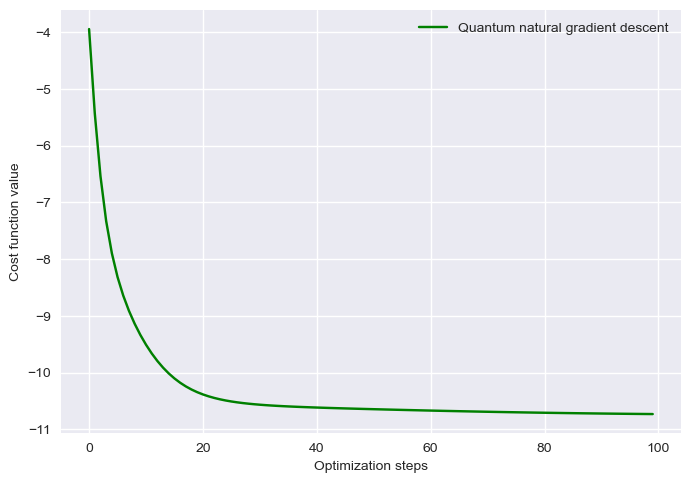

In [31]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
# plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

# Test 

In [3]:
ansatz = Customize_RealAmplidues(5,1)
print(ansatz)

     ┌─────────────────┐ ░                      ░ ┌─────────────────┐
q_0: ┤ Ry($\theta[0]$) ├─░───■──────────────────░─┤ Ry($\theta[5]$) ├
     ├─────────────────┤ ░ ┌─┴─┐                ░ ├─────────────────┤
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■─────────────░─┤ Ry($\theta[6]$) ├
     ├─────────────────┤ ░ └───┘┌─┴─┐           ░ ├─────────────────┤
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├──■────────░─┤ Ry($\theta[7]$) ├
     ├─────────────────┤ ░      └───┘┌─┴─┐      ░ ├─────────────────┤
q_3: ┤ Ry($\theta[3]$) ├─░───────────┤ X ├──■───░─┤ Ry($\theta[8]$) ├
     ├─────────────────┤ ░           └───┘┌─┴─┐ ░ ├─────────────────┤
q_4: ┤ Ry($\theta[4]$) ├─░────────────────┤ X ├─░─┤ Ry($\theta[9]$) ├
     └─────────────────┘ ░                └───┘ ░ └─────────────────┘


In [16]:
from qiskit.primitives import Sampler
import numpy as np


sampler = Sampler()
shots = None
learning_rate = 0.01
operator = Ising_hamiltonian(5,1,2)
grad = np.zeros(ansatz.num_parameters)      
internal_initial_point = np.zeros(ansatz.num_parameters)-0.5
for i in range(ansatz.num_parameters):
    plus_parameter = internal_initial_point.copy()
    plus_parameter[i] += np.pi/2
    minus_parameter = internal_initial_point.copy()
    minus_parameter[i] -= np.pi/2
    grad[i] = (learning_rate)*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2

print(grad)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\3292683753.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  grad[i] = (learning_rate)*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2


[ 0.02628627  0.02393613  0.02310277  0.01657824 -0.01521011 -0.0227879
 -0.02002522 -0.01851081 -0.01919901 -0.01863795]


In [28]:
interation = 1000
khong_biet_dat_ten_gi = []

grad_SPSA = []

for k in range(interation):
    random = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    ck = 0.01
    ak = learning_rate
    grad_SPSA_initial = np.zeros(ansatz.num_parameters) 
    plus_parameter = np.array(internal_initial_point.copy())
    plus_parameter = np.add(plus_parameter,random*ck)
    minus_parameter = np.array(internal_initial_point.copy())
    minus_parameter = np.subtract(minus_parameter,random*ck)
    grad_func = ak*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)) / (2*ck)

    grad_SPSA_initial = np.add(grad_SPSA_initial, grad_func*random)
    grad_SPSA.append(grad_SPSA_initial)
    khong_biet_dat_ten_gi.append(np.linalg.norm(grad - np.array(np.mean(grad_SPSA, axis=0))))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\3944235347.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  grad_func = ak*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)) / (2*ck)


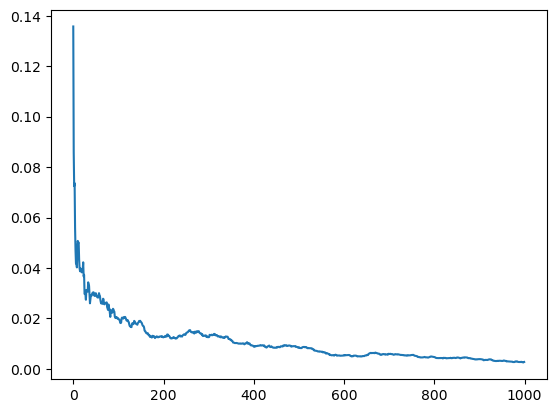

In [29]:
import matplotlib.pyplot as plt
plt.plot(khong_biet_dat_ten_gi)

QNSPSA - QNPSR

In [35]:
from qiskit import QuantumCircuit
super_circuit = Separate_Circuit_Apart(ansatz)
fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
# Measure the fubini-study metric
for i in range(len(super_circuit)):
    if super_circuit[i][0].operation.params:
        g_internal = [[[] for _ in range(super_circuit[i].num_parameters)] for _ in range(super_circuit[i].num_parameters)]
        internal_circuit = QuantumCircuit(super_circuit[i].num_qubits)

        parameter_previous = 0
        for j in range(i):
            parameter_previous += super_circuit[j].num_parameters
            internal_circuit = internal_circuit.compose(super_circuit[j])
        # print(parameter_previous)
        

        internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
        
        # Add string
        string = ['I']*ansatz.num_qubits

        for l in range(super_circuit[i].num_parameters):
            if super_circuit[i][l].operation.name == 'rx':
                string[l] = 'X'
            if super_circuit[i][l].operation.name == 'ry':
                string[l] = 'Y'
            if super_circuit[i][l].operation.name == 'rz':
                string[l] = 'Z'

        quantum_circuit_to_meausurement = QuantumCircuit(ansatz.num_qubits)

        for l in range(len(string)):
            if string[l] == "X":
                quantum_circuit_to_meausurement.h(l)
            if string[l] == "Y":
                quantum_circuit_to_meausurement.rx(np.pi/2, l)
            
        
        quantum_circuit = internal_circuit.compose(quantum_circuit_to_meausurement)
        quantum_circuit.measure_all()
        # print('string: ', string)
        # print(quantum_circuit)
        job = sampler.run(quantum_circuit, shots = shots)

        result = (job.result().quasi_dists[0].binary_probabilities())
        # print(result)
        # term 2 in fubini-study
        term2 = np.zeros(len(string))
        for l in range(super_circuit[i].num_parameters):
            expectation_value = 0
            position_of_non_I_gate = [(ansatz.num_qubits - 1) - l]
            for m in range(len(result)):
                extra_minus = 1
                for n in range(len(position_of_non_I_gate)):
                    if (list(result.keys()))[m][position_of_non_I_gate[n]] == '1':
                        extra_minus *= -1
                expectation_value += result[list(result.keys())[m]]*extra_minus
            term2[l] = expectation_value

        # print('term2:', term2)
        
        
        for l in range(super_circuit[i].num_parameters):
            for m in range(l, super_circuit[i].num_parameters):
                if l == m:
                    fubini_study_metric[l + parameter_previous, l + parameter_previous] = (1 - term2[l]**2)/4
                else:

                    term1_lm = 0
                    position_of_non_I_gate = [(ansatz.num_qubits - 1) - l, (ansatz.num_qubits - 1) - m]
                    for h in range(len(result)):
                        extra_minus = 1
                        for n in range(len(position_of_non_I_gate)):
                            if (list(result.keys()))[h][position_of_non_I_gate[n]] == '1':
                                extra_minus *= -1
                        term1_lm += result[list(result.keys())[h]]*extra_minus
                    
                    fubini_study_metric[l + parameter_previous, m + parameter_previous] = (term1_lm - term2[l]*term2[m])/4
                    fubini_study_metric[m + parameter_previous, l + parameter_previous] = fubini_study_metric[l + parameter_previous, m + parameter_previous]
        # print(fubini_study_metric)
        # print(internal_circuit)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\1114993365.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})


In [36]:
fubini_study_metric

array([[ 2.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [52]:
interation = 1000
khong_biet_dat_ten_gi = []

fubini_matrix_SPSA = []
ck = 0.01
for k in range(interation):
    random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
    # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
    initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
    initial_plus1 = np.add(internal_initial_point, ck*random1)
    initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
    initial_minus1 = np.subtract(internal_initial_point, ck*random1)

    ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

    deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]
    # print(deltaF)
    # Fubini_matrix
    fubini_matrix_SPSA_initial = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
    fubini_matrix_SPSA.append(fubini_matrix_SPSA_initial)
    khong_biet_dat_ten_gi.append(np.linalg.norm(fubini_study_metric - np.array(np.mean(fubini_matrix_SPSA_initial, axis=0))))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:18: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_par

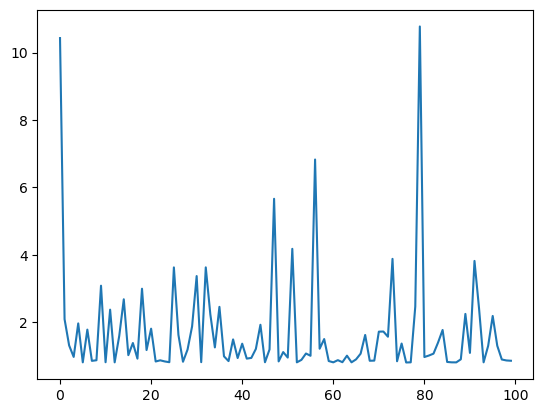

In [54]:
plt.plot(khong_biet_dat_ten_gi[0:100])